# Task 1 - Exploratory Data Analysis (EDA)

## Initial Data Exploration
Connect and load the database - noshow.db. Have a general idea of the type of data in the dataset.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
import numpy as np
%matplotlib inline

engine = engine = create_engine("sqlite:///data/noshow.db")
load_sql = f"""SELECT * FROM noshow ;"""
df = pd.read_sql(load_sql, engine)

#display(df)
#display(df.dtypes)
#display(df.info())
#display(df.describe(include='all'))
#display(df.isnull().sum())

### Data overview

In [4]:
display(df)

display(df.info())

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
0,94113,0.0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,SGD$ 492.98,Website,1,0.0
1,86543,0.0,Orchard,August,November,28.0,November,29.0,Indonesia,Yes,King,SGD$ 1351.22,Website,2,0.0
2,75928,0.0,Changi,March,February,7.0,February,11.0,India,Yes,Single,None,Agent,1,0.0
3,66947,1.0,Orchard,September,October,1.0,October,3.0,China,Yes,Single,SGD$ 666.04,Website,1,0.0
4,106390,0.0,Orchard,March,June,20.0,June,24.0,Australia,Yes,Queen,USD$ 665.37,Website,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119386,4823,0.0,Changi,September,April,3.0,April,5.0,China,Yes,King,USD$ 612.18,Website,1,1.0
119387,25062,0.0,Orchard,March,December,30.0,January,3.0,China,Yes,King,USD$ 1041.29,Email,2,0.0
119388,81936,1.0,Changi,September,March,31.0,April,1.0,Indonesia,Yes,King,USD$ 641.47,Email,1,2.0
119389,6738,0.0,Changi,February,February,25.0,February,27.0,China,Yes,None,SGD$ 886.35,Website,2,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119391 entries, 0 to 119390
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   booking_id      119391 non-null  int64  
 1   no_show         119390 non-null  float64
 2   branch          119390 non-null  object 
 3   booking_month   119390 non-null  object 
 4   arrival_month   119390 non-null  object 
 5   arrival_day     119390 non-null  float64
 6   checkout_month  119390 non-null  object 
 7   checkout_day    119390 non-null  float64
 8   country         119390 non-null  object 
 9   first_time      119390 non-null  object 
 10  room            97778 non-null   object 
 11  price           94509 non-null   object 
 12  platform        119390 non-null  object 
 13  num_adults      119390 non-null  object 
 14  num_children    119390 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 13.7+ MB


None

Insights:
- Incorrect data type for no_show(float64), should be int64.
- Incorrect data type for arrival_day(float64), should be int64.
- Incorrect data type for checkout_day(float64), should be int64.
- Incorrect data type for first_time(object), should be int64.
- Incorrect data type for price(object), should be float64.
- Incorrect data type for num_adults(object), should be int64.
- Incorrect data type for num_children(float64), should be int64.
- Price values is in different currencies - SGD or USD.
- Consider standardize all values in string to lowercases.
- Consider adding another feature - num_days_stay ?
  
Preprocessing:
- convert no_show to int64.
- convert arrival_day to int64.
- convert checkout_day to int64.
- convert first_time to int64.
- convert num_adults to int64.
- convert num_children to int64.
- convert price to float64.
- Standardize the currency to SGD, by converting all USD price to SGD by multipy by 1.3 (USD 1 = SGD 1.3).
- Standardize all string values in dataset to lowercases.
  

### Null Columns Check

In [9]:
# Nulls count for columns with percentage
null_summary = pd.DataFrame({
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df)) * 100
})
display(null_summary)
      

,Null Count,Null Percentage
booking_id,0,0.000000
no_show,1,0.000838
branch,1,0.000838
booking_month,1,0.000838
arrival_month,1,0.000838
arrival_day,1,0.000838
checkout_month,1,0.000838
checkout_day,1,0.000838
country,1,0.000838
first_time,1,0.000838


In [5]:
# Check the target 'no_show' == null
display(df[df["no_show"].isna()])


,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
111598,115536,NaN,None,None,None,NaN,None,NaN,None,None,None,None,None,None,NaN


In [6]:
#check rows with 'room' == null
display(df[df["room"].isna()])    

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
5,55212,0.0,Orchard,November,September,12.0,September,13.0,Indonesia,Yes,None,SGD$ 1499.61,Website,2,2.0
8,109456,1.0,Changi,January,June,27.0,June,28.0,China,Yes,None,USD$ 658.75,Email,2,1.0
9,31117,0.0,Orchard,October,March,22.0,March,24.0,China,Yes,None,USD$ 962.75,Website,1,1.0
17,85014,0.0,Orchard,March,May,10.0,May,12.0,Indonesia,Yes,None,SGD$ 1309.13,Website,one,0.0
19,3158,0.0,Orchard,March,March,30.0,March,31.0,China,Yes,None,USD$ 1056.7,Website,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119357,7903,0.0,Orchard,August,October,12.0,October,13.0,Indonesia,Yes,None,USD$ 534.97,Email,1,1.0
119358,108888,0.0,Orchard,December,February,10.0,February,12.0,China,Yes,None,SGD$ 1200.95,Website,2,0.0
119370,53658,1.0,Changi,April,October,4.0,October,6.0,China,Yes,None,SGD$ 844.46,Agent,one,0.0
119378,91840,0.0,Orchard,September,September,15.0,September,-16.0,Australia,Yes,None,SGD$ 1331.2,Agent,2,0.0


In [12]:
 #check rows with 'price' == null
display(df[df["price"].isna()])  

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
2,75928,0.0,Changi,March,February,7.0,February,11.0,India,Yes,Single,None,Agent,1,0.0
7,23137,0.0,Changi,July,November,18.0,November,19.0,India,Yes,King,None,Email,2,1.0
15,99392,0.0,Orchard,December,August,13.0,August,15.0,India,Yes,Queen,None,Phone,1,1.0
16,28623,0.0,Changi,December,February,22.0,February,23.0,Indonesia,Yes,King,None,Website,2,2.0
18,28009,0.0,Changi,June,July,30.0,July,31.0,Japan,Yes,King,None,Agent,two,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119364,25132,0.0,Changi,April,September,4.0,September,5.0,Malaysia,Yes,King,None,Agent,1,2.0
119367,41443,0.0,Changi,May,September,3.0,September,4.0,Japan,Yes,King,None,Website,1,2.0
119374,116904,0.0,Changi,January,February,15.0,February,-16.0,India,Yes,Single,None,Website,1,1.0
119382,8794,0.0,Orchard,April,February,7.0,February,9.0,China,No,King,None,Website,1,2.0


Insights: 
- A row with all empty values booking_id == 115536.
- 21613 rows with room being None.
- 24882 rows with price being None.

Preprocessing:
- Drop row with booking_id == 115536.
- Impute 21613 'room' by 'mean' price groupby 'branch', 'price'.
- Impute 24882 'price' by mean 'branch', 'room'. 


### Duplicated rows

In [5]:
print(df.duplicated().sum())

0


Insights:
- No duplicated rows.

### Statistical info

In [12]:
# Numeric
display(df.describe())
# Categorical
display(df.describe(include=['object']))

#df.describe(include=['datetime'])
#display(df.describe(include='all'))

,booking_id,no_show,arrival_day,checkout_day,num_children
count,119391.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59695.000000,0.370416,15.798241,14.250507,0.871229
std,34465.357332,0.482918,8.780829,11.063697,0.779796
min,0.000000,0.000000,1.000000,-31.000000,0.000000
25%,29847.500000,0.000000,8.000000,7.000000,0.000000
50%,59695.000000,0.000000,16.000000,15.000000,1.000000
75%,89542.500000,1.000000,23.000000,23.000000,1.000000
max,119390.000000,1.000000,31.000000,31.000000,3.000000


,branch,booking_month,arrival_month,checkout_month,country,first_time,room,price,platform,num_adults
count,119390,119390,119390,119390,119390,119390,97778,94509,119390,119390
unique,2,12,88,12,7,2,4,61867,4,4
top,Changi,June,August,August,China,Yes,King,USD$ 585.23,Website,1
freq,79330,10324,13695,13836,48590,115580,70496,11,54234,62745


Insights:
- 88 unique values in arrival_month which is unusual, need investigate further
- Negative -31 for min 'checkout_day', need investigate further
- price should not be categorical, should be numeric.
- num_adults should not be categorical, should be numeric.

Preprocessing:
- convert price to float64.
- Standardize the currency to SGD, by converting all USD price to SGD by multipy by 1.3 (USD 1 = SGD 1.3).
- clean and convert num_adults to int64.

### Separate features into Categorical and Numerical features

In [113]:
# Excluded "booking_id" (row identifier, irrelevant feature)

categorical_features = ["no_show", "branch", "booking_month", "arrival_month", "checkout_month", "country",
                        "first_time", "room", "num_adults", "num_children", "platform"]

numerical_features = ["arrival_day", "checkout_day","price"] #arrival_day and checkout_day are discrete numeric.

#print(f"Categorical features: {categorical_features}\n")
#print(f"Numerical features: {numerical_features}")

## Univariate Analysis

Examine one variable at a time to understand its basic structure, patterns, and potential issues before moving on to more complex multivariate analysis.

- Identify outliers
- Spread of data
- Check data quality (missing values, incorrect dtype, duplicates, etc)
- Identify imbalanced feature
- Identify any feature engineering needed

Insights will be added below each plot.

In [ ]:
#Summary (Cheat Sheet)
#Scenario	            Best Plot
#One categorical	    Bar plot / Pie chart
#Two categorical	    Grouped bar / Stacked bar / Heatmap
#Categorical vs numeric	Boxplot / Violin / Strip / Swarm

### Distribution of features (Numerical)

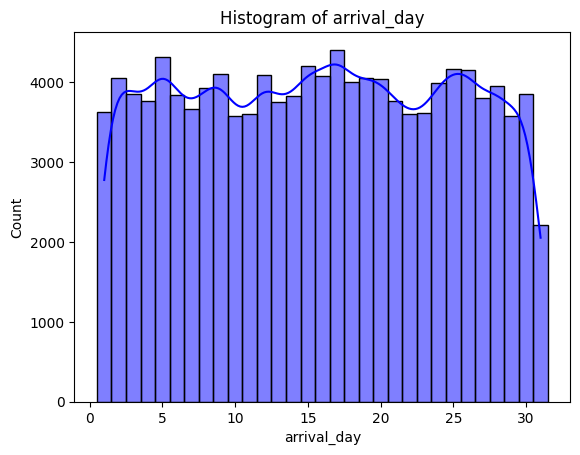

In [21]:
feature = "arrival_day"
sns.histplot(data=df, x=feature, discrete=True, bins=31, color="blue", alpha=0.5, kde=True)
plt.title(f"Histogram of {feature}")
plt.show()

#No special peak days → arrivals are independent of date.
#Good for modeling you don't need to include arrival_day as a strong predictor.
#May indicate consistent business flow.

Insights:
- Distribution Looks Uniform.
- No Clear Trend or Seasonality.
- Arrival on 31st day of month is around half of other days, as not all months of the year has 31st day.

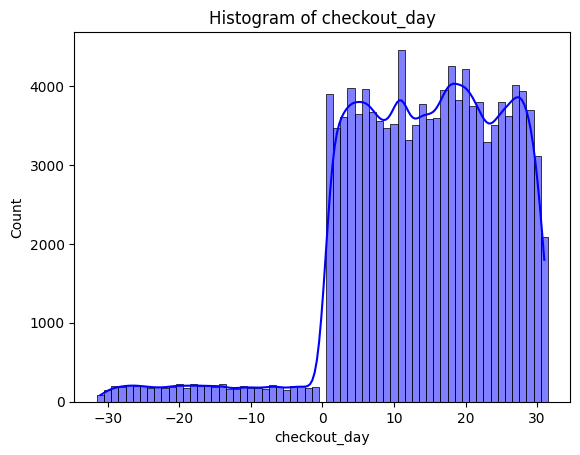

In [22]:
feature = "checkout_day"
sns.histplot(data=df, x=feature, discrete=True, bins=31, color="blue", alpha=0.5, kde=True)
plt.title(f"Histogram of {feature}")
plt.show()

#Visually, negative values form a non-trivial portion of the dataset.
#That means any models that use checkout_day are:
#Biased
#Not interpretable
#Possibly broken

Insights: 
- Negative checkout_day, probably data entry error.

Preprocessing:
- Convert negative days to positive days.

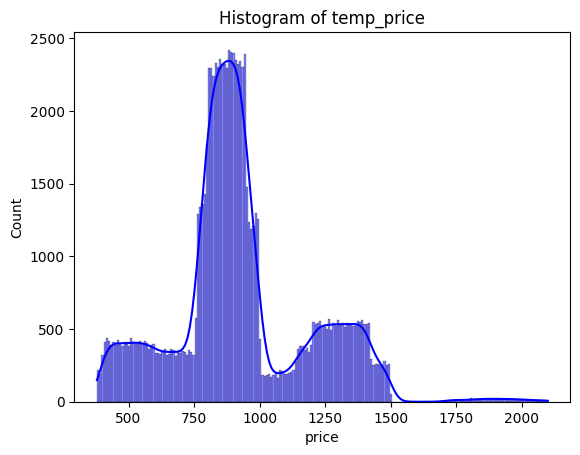

In [2]:
# Temperoray clean "price" for histogram plotting, currently incorrect type for price.

usd_mask = df["price"].str.lower().str.contains("usd", na=False)
# Extract price
temp_price = df['price'].replace(r'[^\d.]', '', regex=True).astype(float)
# Convert those USD prices to SGD by multiplying by 1.3 (USD 1 = SGD 1.3)
temp_price[usd_mask] = temp_price[usd_mask] * 1.3

feature = "temp_price"
sns.histplot(temp_price, color="blue", alpha=0.5, kde=True)
plt.title(f"Histogram of {feature}")
plt.show()


Insights:
- multi-modal distribution, probably different peaks due to different room type pricing.
- right skewed, probably due to small number of premium room with high pricing, thus the small number of bookings.

Preprocessing:
- Convert USD to SGD (multiply by 1.3).
- Remove "USD" or "SGD" from the temp_price data columns, convert the column data type to float.
- Consider using log transform to compress the tail. (#np.log1p(temp_price)) 

### Distribution of features (Categorical)

In [ ]:
categorical_features = ["no_show", "branch", "booking_month", "arrival_month", "checkout_month", "country",
                        "first_time", "room", "num_adults", "num_children"]

no_show
0.0    75166
1.0    44224
Name: count, dtype: int64
No-show rate: 37.0%


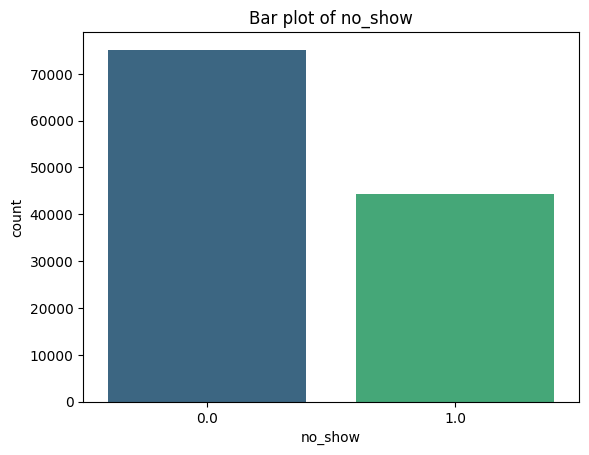

In [34]:
feature = "no_show"
value_counts = df[feature].value_counts()
print(value_counts)
print(f"No-show rate: {df['no_show'].mean():.1%}")

#sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
sns.countplot(x=feature, data=df, hue=feature, palette='viridis', legend=False)
plt.title(f"Bar plot of {feature}")
plt.show()

#print(f"Total : {value_counts.values.sum()}") #75,166 + 44,224 = 119,390
#print(f"No-show ratio (1.0): {value_counts[1] / value_counts.values.sum()}") #44,224 / 119,390 = 0.371 (37.1%)
#print(f"Show-up ratio (0.0): {value_counts[0] / value_counts.values.sum()}")  #75,166 / 119,390 = 0.629 (62.9%)
#| Insight                             | Meaning                                   |
#| ----------------------------------- | ----------------------------------------- |
#| ~38% no-show rate                   | Unusually high, worth investigating       |
#| Moderate class imbalance            | Should consider balanced training methods |
#| Likely high predictive value        | Good target for a classification model    |
#| Suggests specific customer behavior | Possibly speculative or flexible bookings |
#Use ROC-AUC, F1 as primary metrics (not accuracy).
#F1 is useful when:
#You care about detecting no-shows
#Missing a no-show is costly (lost revenue, unused resources)
#Classes are imbalanced
#F1 combines precision and recall:
#Precision: Of all predicted no-shows, how many were correct?
#Recall: Of all actual no-shows, how many did we catch?
#How good is the model at identifying no-shows without too many false alarms?
#| Metric       | Good for                 | Why                                          |
#| ------------ | ------------------------ | -------------------------------------------- |
#| **Accuracy** | ❌ Bad                    | Misleading for imbalanced classes            |
#| **F1**       | Detecting positive class | Balances precision & recall                  |
#| **ROC-AUC**  | Overall model quality    | Threshold-independent, measures separability |



Insights: 
- No-show rate: 37.0%.
- High no_show rate
- Data type is float, should be integer (0, 1).
- Moderate class imbalance.
- Use f1 scoring metric (combines precision and recall), good for detecting positive class, missing a no-show is costly (lost revenue, unused resources).

Preprocessing:
- Convert float 0.0, 1.0 to integer 0, 1.

branch
Changi     79330
Orchard    40060
Name: count, dtype: int64


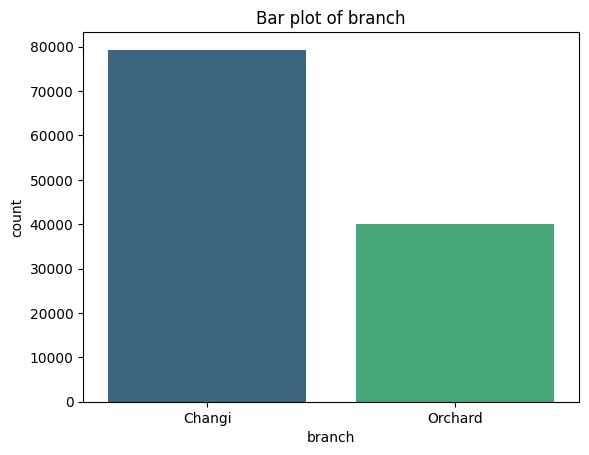

In [37]:
feature = "branch"
value_counts = df[feature].value_counts()
print(value_counts)

#sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
sns.countplot(x=feature, data=df, hue=feature, palette='viridis',legend=False)
plt.title(f"Bar plot of {feature}")
plt.show()

#display(df.groupby('branch')['no_show'].mean())
#75,166 + 44,224 = 119,390
#print(f"Changi ratio: {value_counts["Changi"] / value_counts.values.sum()}") #44,224 / 119,390 = 0.371 (37.1%)
#print(f"Orchard ratio: {value_counts["Orchard"] / value_counts.values.sum()}")  #75,166 / 119,390 = 0.629 (62.9%)
#or
#print(f"Baseline No-show rate: {df[feature].mean():.1%}")"""

Insights: 
- Changi hotel is more popular, double bookings of 'Orchard' branch.
- Huge imbalance between branch.

Preprocessing:
- Convert to lowercase e.g "Changi" to "changi".

booking_month
June         10324
September    10315
November     10280
January      10214
August       10134
October      10068
July          9993
March         9754
February      9588
May           9588
April         9571
December      9561
Name: count, dtype: int64


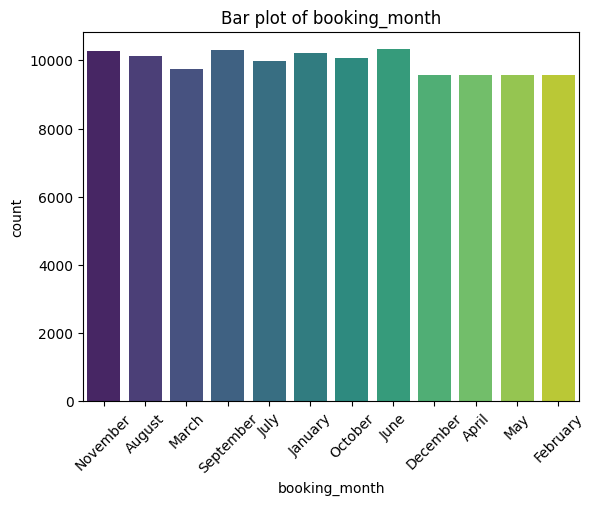

In [38]:
feature = "booking_month"
value_counts = df[feature].value_counts()
print(value_counts)
#print(f"Total : {value_counts.values.sum()}")

#sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
sns.countplot(x=feature, data=df, hue=feature, palette='viridis',legend=False)
plt.xticks(rotation=45)
plt.title(f"Bar plot of {feature}")
plt.show()

#Since booking_month is not strongly varying, it likely won’t be a top feature for a no-show model

Insights: ask
- Evenly distributed across all months.
- No obvious seasonal trends.
- Since booking_month is not strongly varying, it likely won’t be a top feature for a no-show model.

Preprocessing:
- Convert to lowercase e.g "June" to "june".

arrival_month
August      13695
July        12515
May         11684
October     11009
April       10966
            ...  
FebruaRY        1
NovemBeR        1
NOvEmber        1
FEbruarY        1
FeBruaRy        1
Name: count, Length: 88, dtype: int64


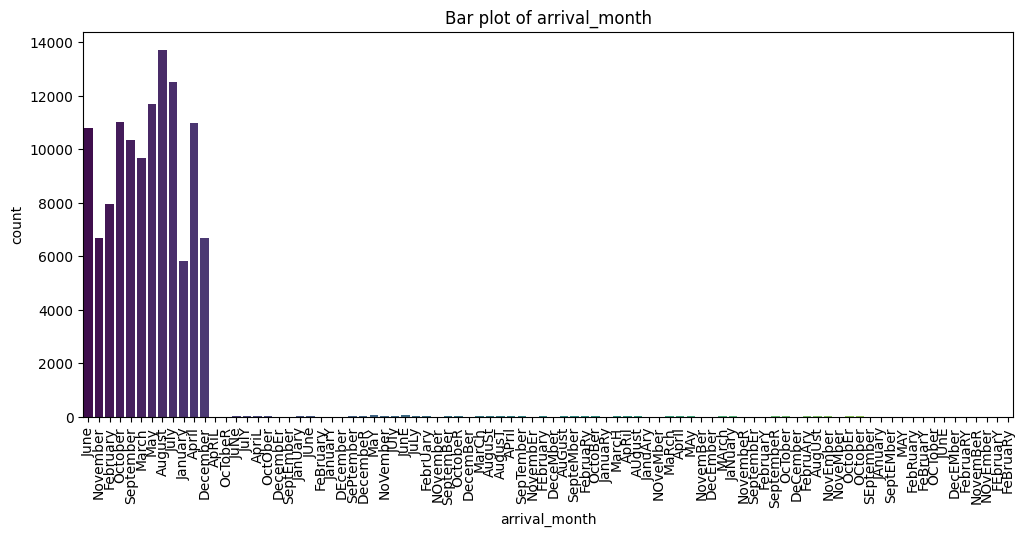

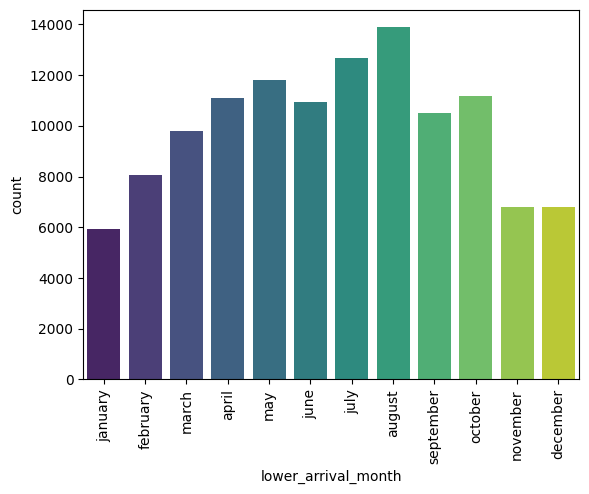

In [47]:
feature = "arrival_month"
value_counts = df[feature].value_counts()
print(value_counts)

fig, ax = plt.subplots(figsize=(12, 5))
#sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
sns.countplot(x=feature, data=df, hue=feature, palette='viridis',legend=False)
ax.set_title(f"Bar plot of {feature}")
plt.xticks(rotation=90)
plt.show()

df['lower_arrival_month'] = df[feature].str.strip().str.lower()
month_order = [
    "january", "february", "march", "april", "may", "june",
    "july", "august", "september", "october", "november", "december"
]
df['lower_arrival_month'] = pd.Categorical(
    df['lower_arrival_month'],
    categories=month_order,
    ordered=True
)

sns.countplot(x=df['lower_arrival_month'], data=df, hue=df['lower_arrival_month'], palette='viridis',legend=False)
ax.set_title(f"Bar plot of {feature}")
plt.xticks(rotation=90)
plt.show()


Insights: 
- Column (arrival_month) contains case variations (e.g. "January" vs "january") thus, creating 88 unique values.
- seasonality in arrival behavior.

Preprocessing:
- Applying lowercase transformation will normalize to 12 valid months.
- Convert column values to lowercase e.g "June" to "june" will normalize to 12 valid months.

country
China        48590
Indonesia    25812
India        15790
Australia    12129
Japan         9391
Singapore     3912
Malaysia      3766
Name: count, dtype: int64


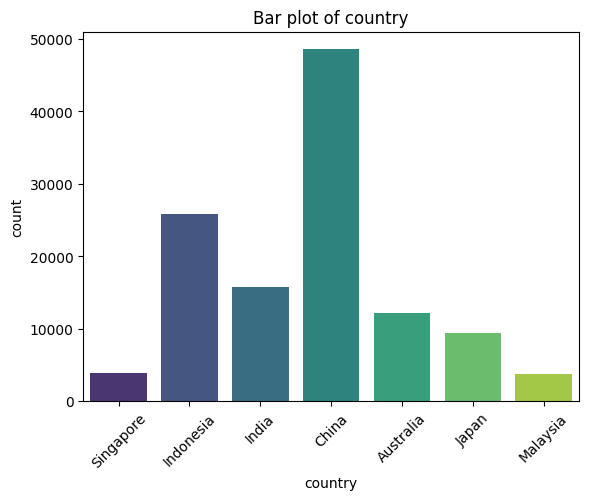

China ratio: 0.40698550967417707
Indonesia ratio: 0.21619901164251612
India ratio: 0.132255632800067


In [53]:
feature = "country"
value_counts = df[feature].value_counts()
print(value_counts)
#print(f"Total : {value_counts.values.sum()}")

#sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
sns.countplot(x=feature, data=df, hue=feature, palette='viridis',legend=False)
plt.xticks(rotation=45) #, ha='right')
plt.title(f"Bar plot of {feature}")
plt.show()

#china/total
#print(f"Total : {value_counts.values.sum()}") #75,166 + 44,224 = 119,390
print(f"China ratio: {value_counts["China"] / value_counts.values.sum()}") #44,224 / 119,390 = 0.371 (37.1%)
print(f"Indonesia ratio: {value_counts["Indonesia"] / value_counts.values.sum()}")
print(f"India ratio: {value_counts["India"] / value_counts.values.sum()}")

#display(df.groupby('country')['no_show'].mean().sort_values())

Insights: 
- China customers made up 40% of the bookings.
- Indonesia customers made up 21% of the bookings.
- China and Indonesia dominate the bookings(61%) out of 7 countries.
- Consider combining Singapore and Malaysia arrivals as Others.

Preprocessing:
- Convert Singapore and Malaysia arrivals as Others.

first_time
Yes    115580
No       3810
Name: count, dtype: int64


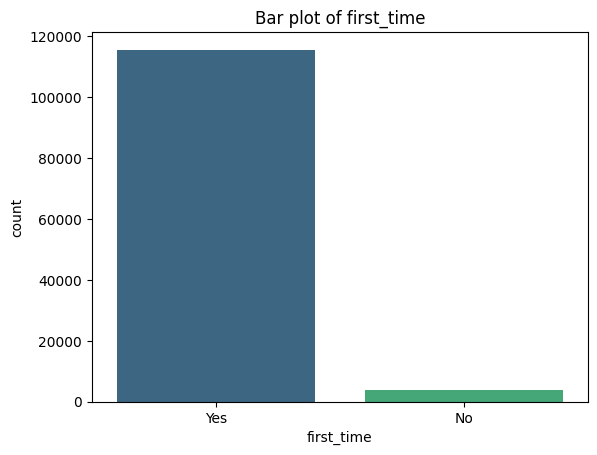

In [55]:
feature = "first_time"
value_counts = df[feature].value_counts()
print(value_counts)

#sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
sns.countplot(x=feature, data=df, hue=feature, palette='viridis',legend=False)
plt.title(f"Bar plot of {feature}")
plt.show()


Insights: 
- Most are new customers (95%), few return customers (5
- Very low loyalty
- Huge imbalance.

Preprocessing:
- Convert to integer64 type, "Yes" as 1 and "No" to 0.


room
King               70496
Single             15697
Queen              10824
President Suite      761
Name: count, dtype: int64
Total : 97778


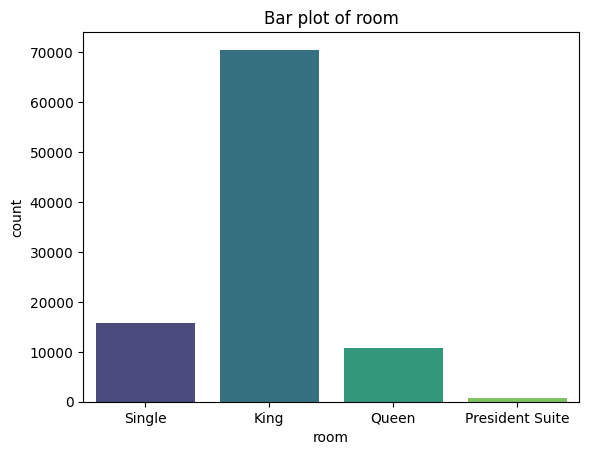

        booking_id  no_show   branch booking_month arrival_month  arrival_day  \
5            55212      0.0  Orchard      November     September         12.0   
8           109456      1.0   Changi       January          June         27.0   
9            31117      0.0  Orchard       October         March         22.0   
17           85014      0.0  Orchard         March           May         10.0   
19            3158      0.0  Orchard         March         March         30.0   
...            ...      ...      ...           ...           ...          ...   
119357        7903      0.0  Orchard        August       October         12.0   
119358      108888      0.0  Orchard      December      February         10.0   
119370       53658      1.0   Changi         April       October          4.0   
119378       91840      0.0  Orchard     September     September         15.0   
119389        6738      0.0   Changi      February      February         25.0   

       checkout_month  chec

In [57]:
feature = "room"
value_counts = df[feature].value_counts()
print(value_counts)
print(f"Total : {value_counts.values.sum()}")

#sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
sns.countplot(x=feature, data=df, hue=feature, palette='viridis',legend=False)
plt.title(f"Bar plot of {feature}")
plt.show()


print(df[df["room"].isna()])

# Target Encoding
#Rare categories	                    Gives stable statistical representation
#Imbalanced categories	                Smooths impact of large categories
#Too many dummy variables	            Only 1 column instead of many
#Category highly correlated with target	Captures that relationship
#| Room   | no_show rate | Target Encoded Value |
#| ------ | ------------ | -------------------- |
#| Single | 0.42         | 0.42                 |
#| King   | 0.35         | 0.35                 |
#| Queen  | 0.33         | 0.33                 |
#| Suite  | 0.12         | 0.12                 |


Insights: 
- Missing many rooms type data, total rows is 119391, data above is only for 97778 bookings.
- 21613 missing room type.
- Imbalance feature

Preprocesing:
- Need to impute the room type according to price and branch from other rows.
- Target Encoding for this feature


num_adults
1      62745
2      45243
one     6334
two     5068
Name: count, dtype: int64


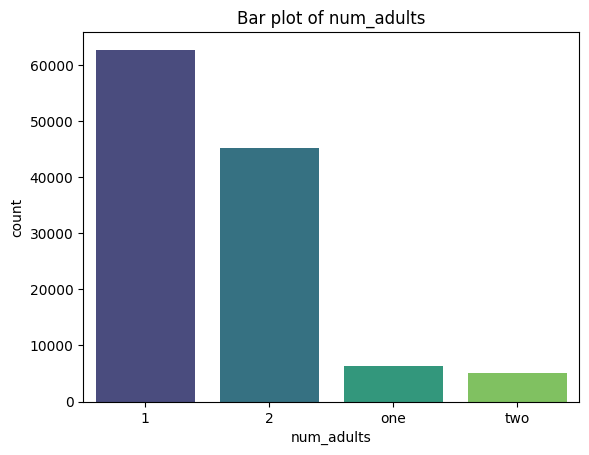

In [58]:
feature = "num_adults"
value_counts = df[feature].value_counts()
print(value_counts)
#print(f"Total : {value_counts.values.sum()}")

sns.countplot(x=feature, data=df, hue=feature, palette='viridis',legend=False)
plt.title(f"Bar plot of {feature}")
plt.show()


Insights: 
- Inconsistent data entry in 'num_adults' column - mixed numeric (1) and string ('one') values.

Preprocessing:
- convert those column values with "one" to 1, "two" to 2.
- convert the column to int64 type.


num_children
1.0    45556
0.0    44728
2.0    28858
3.0      248
Name: count, dtype: int64


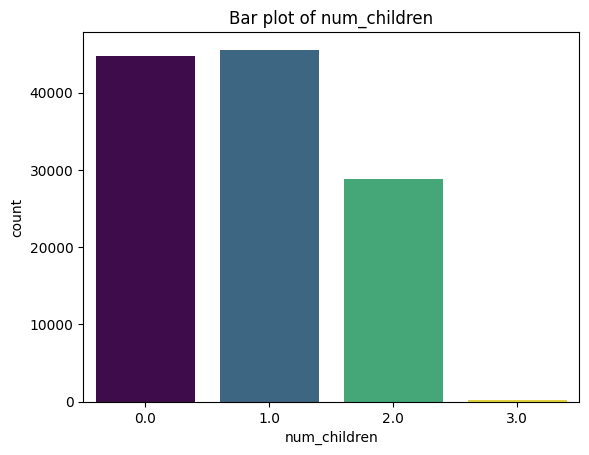

In [60]:
feature = "num_children"
value_counts = df[feature].value_counts()
print(value_counts)
#print(f"Total : {value_counts.values.sum()}")

#sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
sns.countplot(x=feature, data=df, hue=feature, palette='viridis',legend=False)
plt.title(f"Bar plot of {feature}")
plt.show()

Insights: 
- num_children is in float data type.

Preprocessing:
- Convert to int64 data type.
- Add binary feature 'has_children'.

platform
Website    54234
Email      32608
Agent      21735
Phone      10813
Name: count, dtype: int64


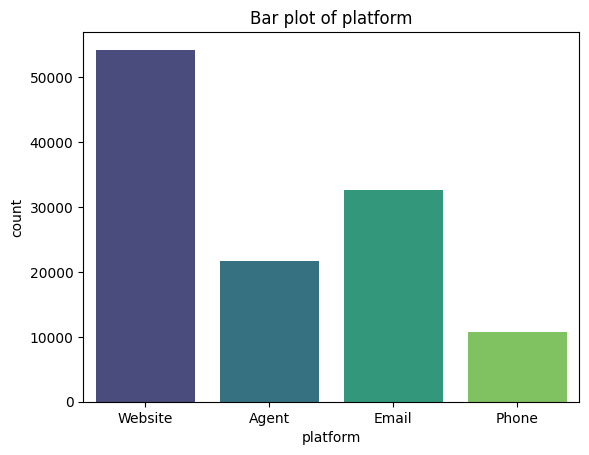

In [61]:
feature = "platform"
value_counts = df[feature].value_counts()
print(value_counts)
#print(f"Total : {value_counts.values.sum()}")

#sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
sns.countplot(x=feature, data=df, hue=feature, palette='viridis',legend=False)
plt.title(f"Bar plot of {feature}")
plt.show()

Insights:
- Majority of bookings is place through hotel web site.

Preprocessing:
- Target Encoding will likely improve predictive power.

### Conclusion of Univariate analysis


## Preprocessing Data

Temperorary preprocess necessary data for next step - Bivariate analysis.


In [ ]:
"""
categorical_features = ["no_show", "branch", "booking_month", "arrival_month", "checkout_month", "country",
                        "first_time", "room", "num_adults", "num_children", "platform"]
numerical_features = ["arrival_day", "checkout_day","price"]
"""

In [ ]:
"""- convert no_show to int64.
- convert arrival_day to int64.
- convert checkout_day to int64.
- convert first_time to int64.
- convert num_adults to int64.
- convert num_children to int64.
- convert price to float64.
- Standardize the currency to SGD, by converting all USD price to SGD by multipy by 1.3 (USD 1 = SGD 1.3).
- Standardize all string values in dataset to lowercases."""
"""
- Drop row with booking_id == 115536.
- Impute 21613 rows with room type according to nearest price.
- Impute 24882 rows with price = 0.
"""

In [62]:
def price_range_imputation(df):
    # Calculate price ranges for each room type from known data
    room_price_ranges = df[df['room'].notna()].groupby('room')['price'].agg(['min', 'max', 'mean', 'std']).reset_index()
    
    def assign_room_by_price(price):
        if pd.isna(price):
            return None
        
        # Find the room type whose price range contains this price
        for _, room_data in room_price_ranges.iterrows():
            room_min = room_data['min']
            room_max = room_data['max']
            room_std = room_data['std']
            
            # Check if price falls within reasonable range (mean ± 2std)
            room_mean = room_data['mean']
            lower_bound = room_mean - (2 * room_std)
            upper_bound = room_mean + (2 * room_std)
            
            if lower_bound <= price <= upper_bound:
                return room_data['room']
        
        # If no exact match, find closest mean price
        room_price_ranges['distance'] = abs(room_price_ranges['mean'] - price)
        closest_room = room_price_ranges.loc[room_price_ranges['distance'].idxmin(), 'room']
        return closest_room
    
    # Apply imputation
    missing_mask = df['room'].isna()
    df.loc[missing_mask, 'room'] = df.loc[missing_mask, 'price'].apply(assign_room_by_price)
    
    return df

In [63]:
df = df[df["booking_id"] != 115536]  #remove the all empty row
df["branch"] = df["branch"].str.lower()
df["booking_month"] = df["booking_month"].str.lower()
df["arrival_month"] = df["arrival_month"].str.lower()
df["checkout_month"] = df["checkout_month"].str.lower()
df["country"] = df["country"].str.lower()
df["first_time"] = df["first_time"].str.lower()
df["num_adults"] = df["num_adults"].str.lower()
df["platform"] = df["platform"].str.lower()
df["room"] = df["room"].str.lower()
df["price"] = df["price"].str.lower()

df["no_show"] = df["no_show"].astype(int)
df["arrival_day"] = df["arrival_day"].astype(int)

df["num_children"] = df["num_children"].astype(int)

#df["checkout_day"] = pd.to_numeric(df["checkout_day"], errors='coerce')
df["checkout_day"] = df["checkout_day"].astype(int)
df["checkout_day"] = df["checkout_day"].apply(lambda x: (x * -1) if x < 0 else x)

df["num_adults"] = df["num_adults"].apply(lambda x: 1 if x == "one" else (2 if x == "two" else x))
#df["num_adults"] = df["num_adults"].map({"one": 1, "two": 2})
df["num_adults"] = df["num_adults"].astype(int)

df["first_time"] = df["first_time"].apply(lambda x: 1 if x == "yes" else 0)
df["first_time"] = df["first_time"].astype(int)

df['price'] = df['price'].fillna(0)
usd_mask = df["price"].str.contains("usd", na=False)
temp_price = df['price'].replace(r'[^\d.]', '', regex=True).astype(float)
temp_price = pd.to_numeric(temp_price, errors='coerce')
temp_price[usd_mask] = temp_price[usd_mask] * 1.3     #(USD 1 = SGD 1.3)
df["price"] = temp_price

#impute those 0 "price" according to nearest room
# Calculate average prices by room type from available data
room_avg_prices = df[df['price'] != 0].groupby('room')['price'].agg(['mean', 'median', 'std', 'count']).round(2)
#print("Room type price statistics:")
#print(room_avg_prices)

# Impute using room-type medians (robust to outliers)
room_median_prices = df[df['price'] != 0].groupby('room')['price'].median()

def impute_by_room(row):
    if (row['price'] == 0) and row['room'] in room_median_prices:       
        return room_median_prices[row['room']]
    return row['price']

df['price'] = df.apply(impute_by_room, axis=1)


#impute empty room type
df = price_range_imputation(df)

# custom convert months to int
# then convert int months to cyclinical encoding.

print(df)


        booking_id  no_show   branch booking_month arrival_month  arrival_day  \
0            94113        0   changi      november          june           25   
1            86543        0  orchard        august      november           28   
2            75928        0   changi         march      february            7   
3            66947        1  orchard     september       october            1   
4           106390        0  orchard         march          june           20   
...            ...      ...      ...           ...           ...          ...   
119386        4823        0   changi     september         april            3   
119387       25062        0  orchard         march      december           30   
119388       81936        1   changi     september         march           31   
119389        6738        0   changi      february      february           25   
119390       99643        0   changi         march          july           18   

       checkout_month  chec

In [4]:
#verify correct data types and nulls
display(df.info())
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, 0 to 119390
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   booking_id      119390 non-null  int64  
 1   no_show         119390 non-null  int64  
 2   branch          119390 non-null  object 
 3   booking_month   119390 non-null  object 
 4   arrival_month   119390 non-null  object 
 5   arrival_day     119390 non-null  int64  
 6   checkout_month  119390 non-null  object 
 7   checkout_day    119390 non-null  int64  
 8   country         119390 non-null  object 
 9   first_time      119390 non-null  int64  
 10  room            119390 non-null  object 
 11  price           119390 non-null  float64
 12  platform        119390 non-null  object 
 13  num_adults      119390 non-null  int64  
 14  num_children    119390 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 14.6+ MB


None

booking_id        0
no_show           0
branch            0
booking_month     0
arrival_month     0
arrival_day       0
checkout_month    0
checkout_day      0
country           0
first_time        0
room              0
price             0
platform          0
num_adults        0
num_children      0
dtype: int64

In [66]:
# no_show - convert from float to int, one missing value.
#feature = "no_show"
print(df[df["no_show"].isnull()])
print(f"{feature} data type (before): {df[feature].dtype}")
#df[feature] = df[feature].astype(int)
#print(f"{feature} data type (after): {df[feature].dtype}")

Empty DataFrame
Columns: [booking_id, no_show, branch, booking_month, arrival_month, arrival_day, checkout_month, checkout_day, country, first_time, room, price, platform, num_adults, num_children, lower_arrival_month]
Index: []
no_show data type (before): int64


## Feature Engineering

Temperorary add some feature to aid in next step of Bivariate analysis
- Add feature num_days_stayed, has_children


In [68]:
#df["has_children"] = df.apply(lambda x: 1 if x["num_children"] > 0 else 0)
#print(df["num_children"].unique())
df["has_children"] = df["num_children"].map({0:0, 1:1, 2:1, 3:1})
#print(df["has_children"])

#print(df[df["checkout_day"] < 1])
#print(df["checkout_day"].unique())

# Complete month mapping dictionary
month_to_num = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6,
    'july': 7, 'august': 8, 'september': 9, 'october': 10, 'november': 11, 'december': 12
}
# Convert month strings to numbers
#df['arrival_month_num'] = df['arrival_month'].map(month_to_num)
#df['checkout_month_num'] = df['checkout_month'].map(month_to_num)

# Verify conversion
#print(df[['arrival_month', 'arrival_month_num', 'checkout_month', 'checkout_month_num']].head())

# Create year columns (assuming same year for simplicity)
df['arrival_year'] = 2024  # Adjust based on your data context
df['checkout_year'] = 2024

# Most robust method - no format strings needed
df['arrival_date'] = pd.to_datetime({
    'year': 2024,
    'month': df['arrival_month'].str.lower().map(month_to_num),
    'day': df['arrival_day']
}, errors='coerce')

df['checkout_date'] = pd.to_datetime({
    'year': 2024,
    'month': df['checkout_month'].str.lower().map(month_to_num), 
    'day': df['checkout_day']
}, errors='coerce')

# Calculate days stayed
df['days_stayed'] = (df['checkout_date'] - df['arrival_date']).dt.days

df['days_stayed'] = df['days_stayed'].apply(lambda x: 366 + x if x < 0 else x)
print(df[df['days_stayed'] < 0])

# Display results
print(df[['arrival_date', 'checkout_date', 'days_stayed']].head())

Empty DataFrame
Columns: [booking_id, no_show, branch, booking_month, arrival_month, arrival_day, checkout_month, checkout_day, country, first_time, room, price, platform, num_adults, num_children, lower_arrival_month, has_children, arrival_year, checkout_year, arrival_date, checkout_date, days_stayed]
Index: []

[0 rows x 22 columns]
  arrival_date checkout_date  days_stayed
0   2024-06-25    2024-06-27            2
1   2024-11-28    2024-11-29            1
2   2024-02-07    2024-02-11            4
3   2024-10-01    2024-10-03            2
4   2024-06-20    2024-06-24            4


## Bivariate Analysis

Bivariate analysis is used to explore relationships between two variables, understand how they interact, compare groups, detect patterns, and prepare for deeper multivariate analysis, improved understanding before modeling.


### Categorical vs Target

In [ ]:
#Your Variable Types	Best Graphs to Plot
"""
Numerical vs. Numerical	
1. Scatter Plot
2. Line Plot (for time series)
3. Heatmap (for correlation)

Categorical vs. Numerical	
1. Box Plot (Box-and-Whisker)
2. Violin Plot
3. Bar Plot (with means)
4. Histogram / Density Plot (facetted)

Categorical vs. Categorical	
1. Stacked Bar Plot
2. Grouped Bar Plot
3. Mosaic Plot
4. Heatmap (with counts)
"""


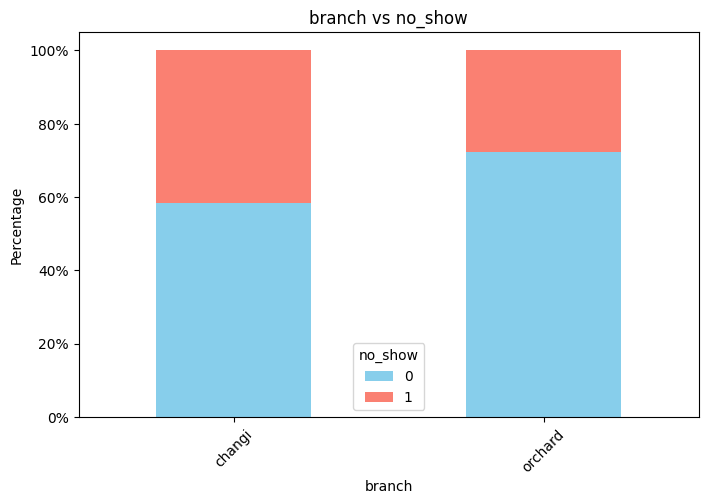

p value: 0.0000


In [80]:
#Study relationships between each feature and the target variable (e.g., no_show).
categorical_features = ["no_show", "branch", "booking_month", "arrival_month", "checkout_month", "country",
                        "first_time", "room", "num_adults", "num_children", "platform"]
target = "no_show"
fig, ax = plt.subplots(figsize=(8, 5))
#sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
#sns.countplot(x=feature, hue="no_show", data=df)
cross = pd.crosstab(df[feature], df[target], normalize="index")
#cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"])
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
'''for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height'''

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45) #, ha='right')
plt.show()

contingency = pd.crosstab(df["branch"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- Changi branch got higher percentage of no_show customers.
- branch location clearly affects no-show behavior.
- branch is predictive.
- chi-square test, p < 0.05, branch and no_show are significantly dependent.

In [ ]:
'''branch is predictive of no_show because the class distribution differs significantly across branches.

You should include it as an important categorical feature in your model.
The model can then learn:

Higher branch_changi → higher chance of no_show

Model impact

Because this is a categorical variable with few distinct values (2 branches):

Works well with tree-based models (Decision Tree, Random Forest, XGBoost) — they handle categorical splits easily.

Works fine with Logistic Regression after one-hot encoding.

Not ideal for models sensitive to high cardinality features (not a problem here since only 2 categories).

import scipy.stats as stats
contingency = pd.crosstab(df["branch"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

#from scipy.stats import chi2_contingency
#contingency = pd.crosstab(df["branch"], df["no_show"])
#chi2, p, dof, expected = chi2_contingency(contingency)
print(p)

    If p < 0.05, → branch and no_show are significantly dependent.

Interpreting the p-value
p-value Range	Interpretation	Meaning
p < 0.05	✅ Statistically Significant	Strong evidence that branch and no-show are related
p < 0.01	✅ Highly Significant	Very strong evidence of relationship
p < 0.001	✅ Very Highly Significant	Extremely strong evidence
p ≥ 0.05	❌ Not Significant	No strong evidence of relationship'''

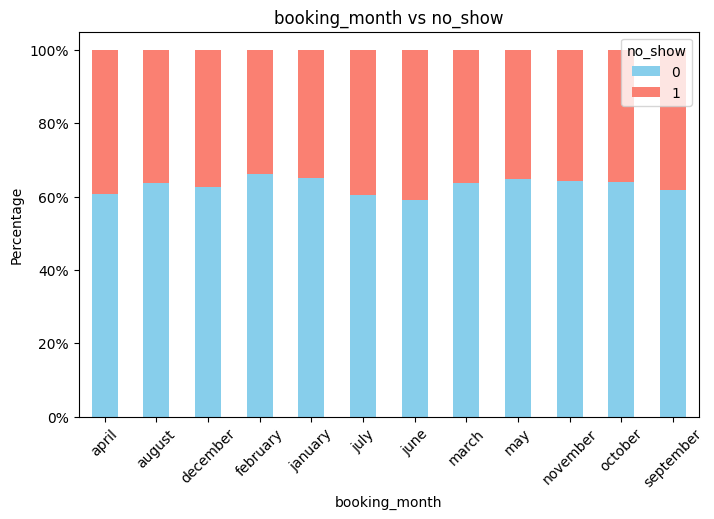

p value: 0.0000


In [83]:
target = "no_show"
feature = "booking_month"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
'''for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height'''

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

contingency = pd.crosstab(df["booking_month"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- No-show rates are fairly consistent across months
- variation is small, meaning booking month is not a strong driver of no-shows
- chi-square test, p < 0.05, booking_month is relevant.
- Consider cyclical encoding for months.

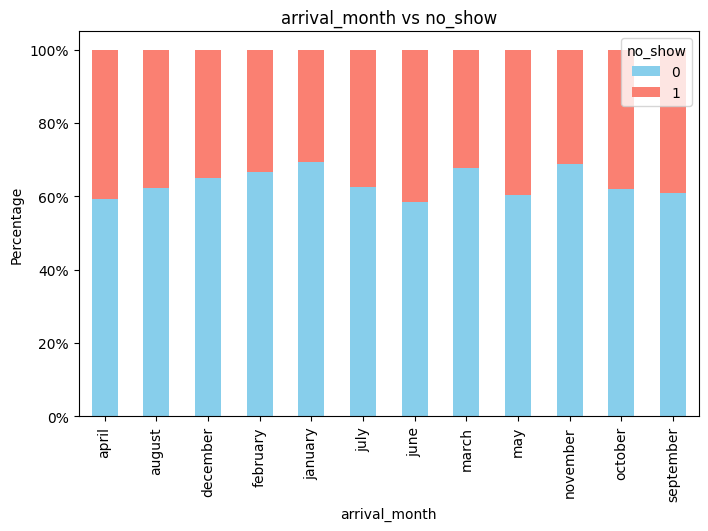

p value: 0.0000


In [84]:
target = "no_show"
feature = "arrival_month"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
'''for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height'''

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=90)
plt.show()

contingency = pd.crosstab(df["arrival_month"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- no_show varies only slightly across arrival months.
- chi-square test, p < 0.05, arrival_month is relevant feature.
- Statistically significant but not a strong predictor.
- Consider cyclical encoding for months.

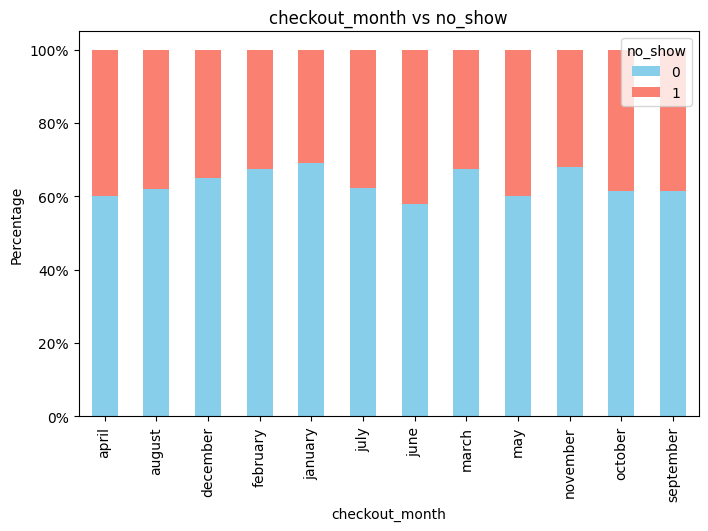

p value: 0.0000


In [85]:
#checkout_month
target = "no_show"
feature = "checkout_month"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
'''for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height'''

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=90)
plt.show()

contingency = pd.crosstab(df["checkout_month"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- no-show percentage varies slightly between months.
- chi-square test, p < 0.05, checkout_month is relevant feature.
- Statistically significant but not a strong predictor.
- Consider cyclical encoding for months.

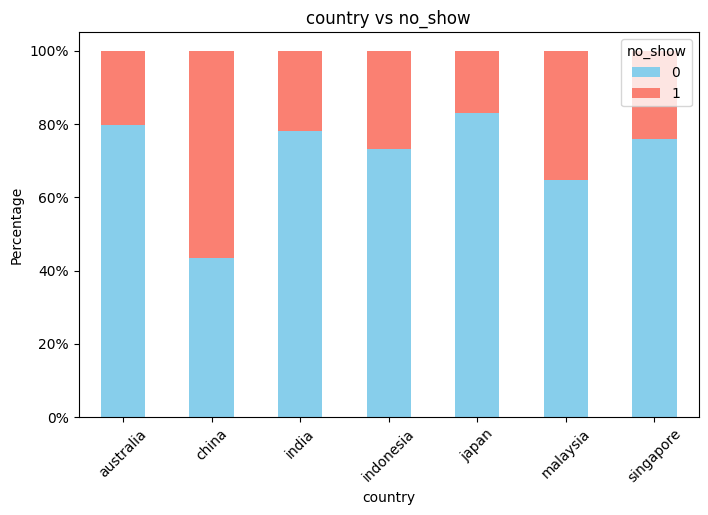

p value: 0.0000


In [86]:
target = "no_show"
feature = "country"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
'''for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height'''

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

contingency = pd.crosstab(df["country"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights: 
- China customers no_show more than half of their bookings (56.6%), which is much higher than other countries.
- Huge variation in no-show rates across countries.
- chi-square test, p < 0.05, country and no_show are significantly dependent.
- Strongest categorical predictors.
- Target Encoding.

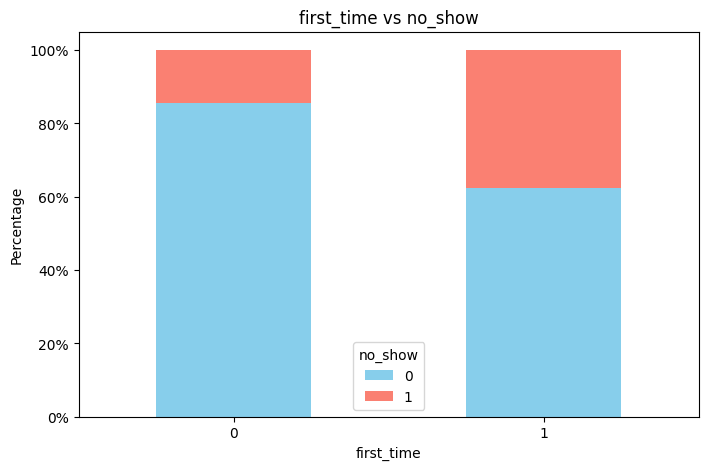

p value: 0.0000


In [87]:
target = "no_show"
feature = "first_time"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
'''for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height'''

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

contingency = pd.crosstab(df["first_time"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- first_time booking customers has greater no_show percentage.
- chi-square test, p < 0.05, first_time and no_show are significantly dependent.
- Strong predictor

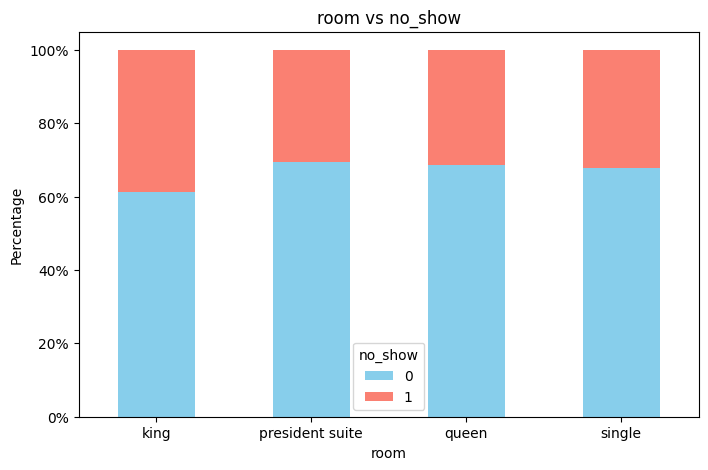

p value: 0.0000


In [88]:
target = "no_show"
feature = "room"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
'''for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height'''

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

contingency = pd.crosstab(df["room"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- room type king has the most no_show.
- chi-square test, p < 0.05, room and no_show are significantly dependent.
- Target Encoding
- President Suite has low sample size
- Smoothing highly recommended

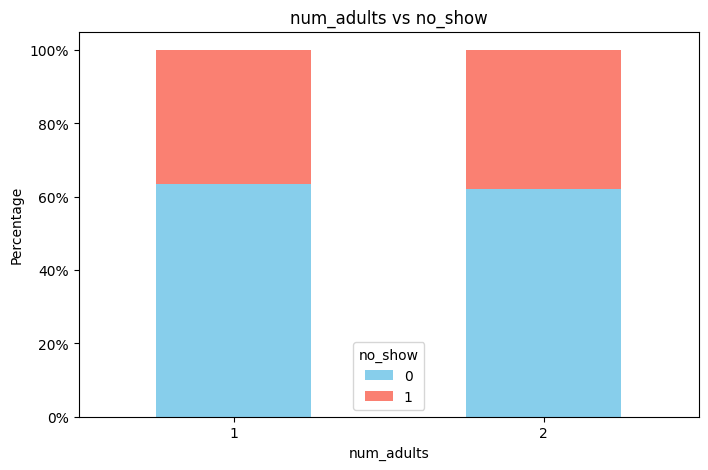

p value: 0.0000


In [89]:
target = "no_show"
feature = "num_adults"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
'''for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height'''

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

contingency = pd.crosstab(df["num_adults"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- Almost similar no_show rate between 1 or 2 adults.
- chi-square test, p < 0.05, num_adults and no_show are significantly dependent.
- statistically significant but NOT practically significant.
- num_adults is NOT a strong predictor of no-show.
- can minmax scaling

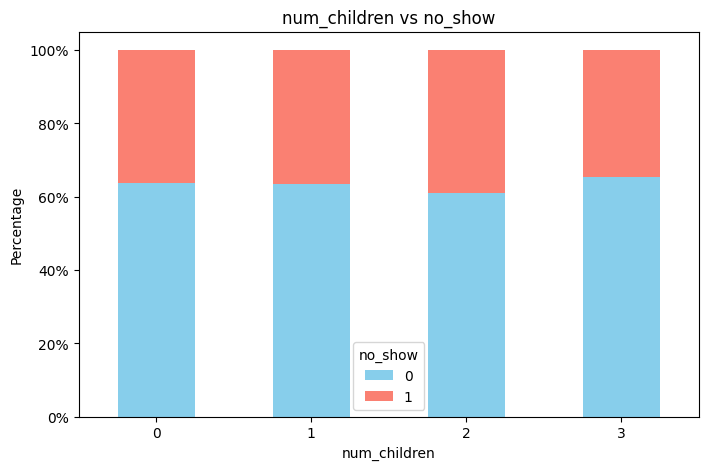

p value: 0.0000


In [90]:
target = "no_show"

feature = "num_children"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
'''for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height'''

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

contingency = pd.crosstab(df["num_children"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- Variation is tiny → the number of children does NOT strongly influence the probability of no-show
- 2 children is the highest no-show rate
- chi-square test, p < 0.05, num_children and no_show are significantly dependent.
- Feature importance: LOW

In [92]:
#numerical_features = ["arrival_day", "checkout_day","price"]
'''target = "no_show"
feature = "arrival_day"
fig, ax = plt.subplots(figsize=(8, 5))
#sns.boxplot(x=target, y=feature, data=df, hue=target, palette="pastel", legend=False)
#sns.countplot(x=feature, hue=target, data=df, palette="pastel")
sns.pointplot(x=feature, y=target, data=df, estimator="mean", color="steelblue", errorbar=None)
#color="steelblue",


# Format y-axis as percentages
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_ylabel(f"mean no_show ratio")
ax.set_xlabel(f"{feature}")
plt.xticks(rotation=45) #, ha='right')
#plt.legend()
plt.tight_layout()
plt.show()


contingency = pd.crosstab(df["arrival_day"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")'''

'target = "no_show"\nfeature = "arrival_day"\nfig, ax = plt.subplots(figsize=(8, 5))\n#sns.boxplot(x=target, y=feature, data=df, hue=target, palette="pastel", legend=False)\n#sns.countplot(x=feature, hue=target, data=df, palette="pastel")\nsns.pointplot(x=feature, y=target, data=df, estimator="mean", color="steelblue", errorbar=None)\n#color="steelblue",\n\n\n# Format y-axis as percentages\n#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f\'{y:.0%}\'))\n\nax.set_title(f"{feature} vs {target}")\nax.set_ylabel(f"mean no_show ratio")\nax.set_xlabel(f"{feature}")\nplt.xticks(rotation=45) #, ha=\'right\')\n#plt.legend()\nplt.tight_layout()\nplt.show()\n\n\ncontingency = pd.crosstab(df["arrival_day"], df["no_show"])\nchi2, p, dof, expected = stats.chi2_contingency(contingency)\nprint(f"p value: {p:.4f}")'

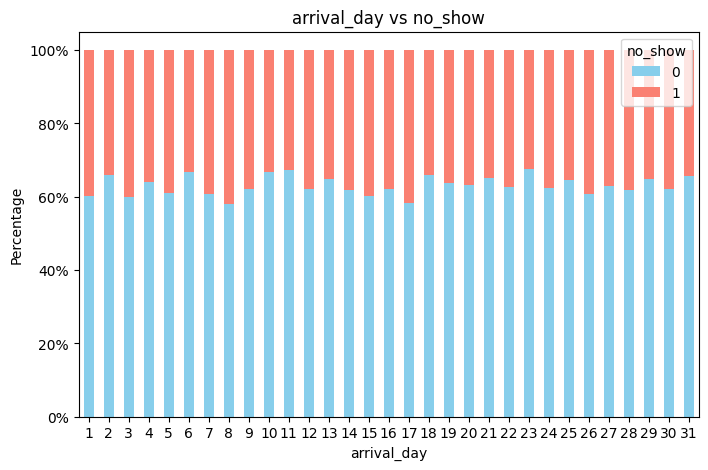

p value: 0.0000


In [91]:
target = "no_show"
feature = "arrival_day"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

contingency = pd.crosstab(df["num_children"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- No-show behavior does not significantly depend on the arrival day
- chi-square test, p < 0.05, arrival_day and no_show are significantly dependent
- Statistical significance ≠ predictive usefulness
- Consider cyclical encoding for arrival_day.
- No specific arrival day leads to more cancellations.
- No operational staffing changes needed per day.
- Customer behavior is stable across the entire month.

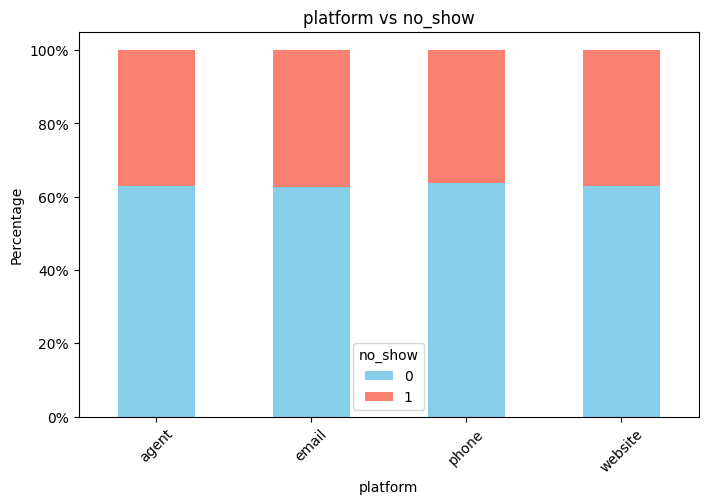

p value: 0.145886140803151


In [93]:
target = "no_show"
feature = "platform"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

#import scipy.stats as stats
#contingency = pd.crosstab(df["platform"], df["no_show"])
#chi2, p, dof, expected = stats.chi2_contingency(contingency)
#print(f"Chi-square p-value: {p}")
#If p < 0.05, there’s a significant relationship between booking platform and no-shows — confirming what you visually see.
#from sklearn.feature_selection import chi2, SelectKBest
#selector = SelectKBest(chi2, k=10)
#X_new = selector.fit_transform(X_categorical, y)
# If multiple features are highly related to each other:
# - Redundant information
# - Model instability
# - Overfitting risk

# Check Variance Inflation Factor (VIF)
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#Variance Inflation Factor (VIF) is a measure used to detect multicollinearity

contingency = pd.crosstab(df["platform"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p}")

Insights:
- Roughly same no_show for platform bookings.
- chi-square test, p >= 0.05, not Significant, no strong evidence of relationship.
- Keep it, but treat it as a low-importance feature.

In [114]:
'''target = "no_show"
feature = "checkout_day"
#df["checkout_day_temp"] = df[feature].apply(lambda x: (x * -1) if x < 0 else x)
#df["checkout_day_temp"] = pd.to_numeric(df["checkout_day_temp"], errors='coerce')
#feature = "checkout_day_temp"

fig, ax = plt.subplots(figsize=(8, 5))
#sns.boxplot(x=target, y=feature, data=df, hue=target, palette="pastel", legend=False)
#sns.countplot(x=feature, hue=target, data=df, palette="pastel")
#sns.pointplot(x=feature, y=target, data=df, estimator="mean", color="steelblue")
sns.pointplot(x=feature, y=target, data=df, estimator="mean", color="steelblue", errorbar=None)


# Format y-axis as percentages
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
#ax.set_ylabel(f"frequency")
#ax.set_xlabel(f"{feature}")
ax.set_ylabel("No-show Rate")
ax.set_xlabel("Day of Month")
plt.xticks(rotation=45) #, ha='right')
#plt.legend()
#plt.tight_layout()
plt.show()

#t-test
#group0 = df.loc[df["no_show"] == 0, "checkout_day"]
#group1 = df.loc[df["no_show"] == 1, "checkout_day"]
#t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=False)
#print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
#p < 0.05 → significant difference between the groups
#p ≥ 0.05 → no significant difference

contingency = pd.crosstab(df["checkout_day"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")'''

'target = "no_show"\nfeature = "checkout_day"\n#df["checkout_day_temp"] = df[feature].apply(lambda x: (x * -1) if x < 0 else x)\n#df["checkout_day_temp"] = pd.to_numeric(df["checkout_day_temp"], errors=\'coerce\')\n#feature = "checkout_day_temp"\n\nfig, ax = plt.subplots(figsize=(8, 5))\n#sns.boxplot(x=target, y=feature, data=df, hue=target, palette="pastel", legend=False)\n#sns.countplot(x=feature, hue=target, data=df, palette="pastel")\n#sns.pointplot(x=feature, y=target, data=df, estimator="mean", color="steelblue")\nsns.pointplot(x=feature, y=target, data=df, estimator="mean", color="steelblue", errorbar=None)\n\n\n# Format y-axis as percentages\n#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f\'{y:.0%}\'))\n\nax.set_title(f"{feature} vs {target}")\n#ax.set_ylabel(f"frequency")\n#ax.set_xlabel(f"{feature}")\nax.set_ylabel("No-show Rate")\nax.set_xlabel("Day of Month")\nplt.xticks(rotation=45) #, ha=\'right\')\n#plt.legend()\n#plt.tight_layout()\nplt.show()\n\n#t-test\

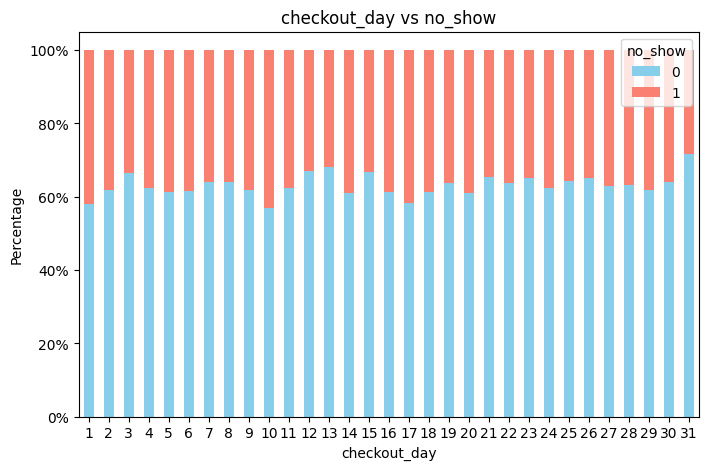

p value: 0.0000


In [96]:
target = "no_show"
feature = "checkout_day"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

contingency = pd.crosstab(df["num_children"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

#Alternative (simple)
#Bin the days into categories:
#early month (1–10)
#mid-month (11–20)
#late month (21–31)

Insights:
- No meaningful pattern or trend.
- chi-square test, p < 0.05, checkout_day and no_show are significantly dependent.
- checkout day is not a strong predictor of no-show behavior.
- cyclical encoding

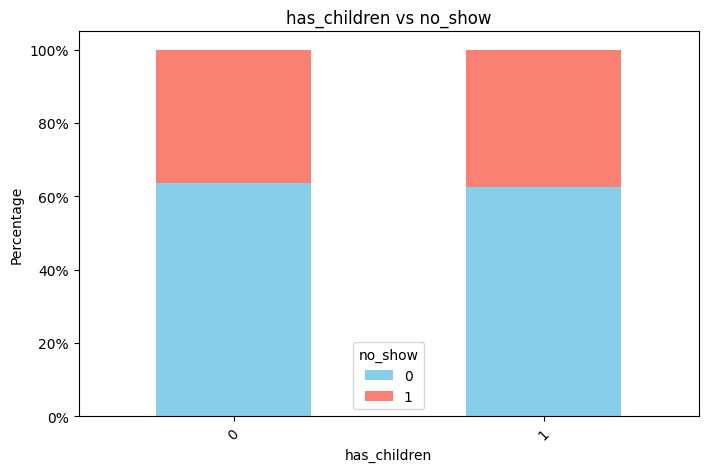

p value: 0.0001716014946478499


In [97]:
target = "no_show"
feature = "has_children"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

contingency = pd.crosstab(df["has_children"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p}")

Insights:
- Having children does not significantly change the no-show rate
- chi-square test, p < 0.05, has_children and no_show are significantly dependent.
- not a strong predictor

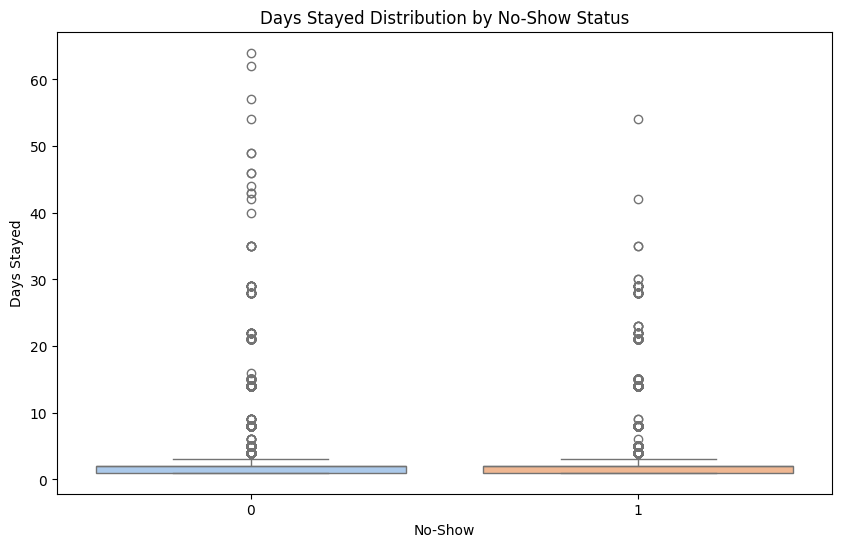

0.000000


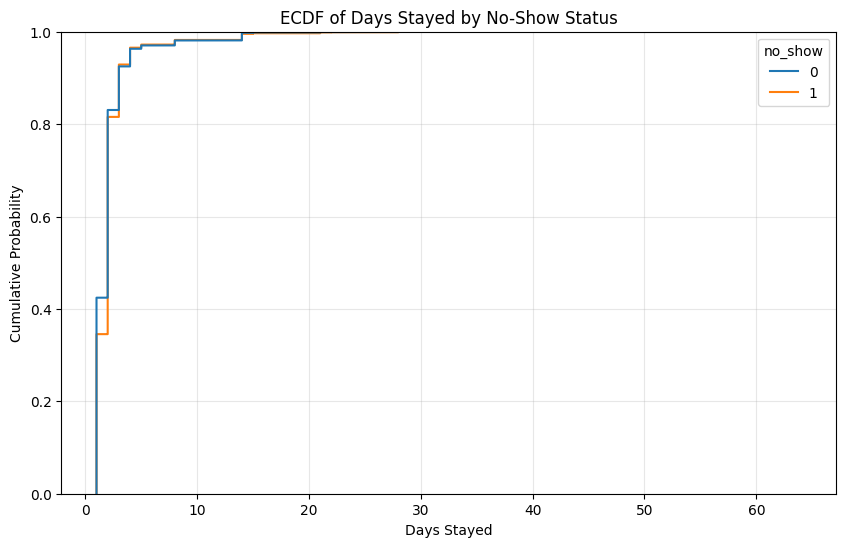

In [102]:
target = "no_show"
feature = "days_stayed"

plt.figure(figsize=(10, 6))
#sns.boxplot(x=target, y=feature, data=df)
sns.boxplot(x=target, y=feature, data=df, hue=target, palette="pastel", legend=False)
plt.title('Days Stayed Distribution by No-Show Status')
plt.xlabel('No-Show')
plt.ylabel('Days Stayed')
plt.show()

result = stats.ttest_ind(
    df.loc[df["no_show"] == 0, "days_stayed"],
    df.loc[df["no_show"] == 1, "days_stayed"],
    equal_var=False
)

#print(result.statistic)
print(f"{result.pvalue:4f}")

plt.figure(figsize=(10,6))
sns.ecdfplot(data=df, x="days_stayed", hue="no_show")
plt.title("ECDF of Days Stayed by No-Show Status")
plt.xlabel("Days Stayed")
plt.ylabel("Cumulative Probability")
plt.grid(True, alpha=0.3)
plt.show()

Insights:
- No major difference in stay duration between No-Show and Show customers
- Days stayed is NOT a strong predictor of no-show.
- consider add is_long_stay (1 if stay ≥ 7 days else 0)
- Stay bucket
1 day
2–3 days
4–6 days
7+ days
- The ECDF Distributions Are Nearly Identical.
- Number of days stayed does not meaningfully differ between customers who show up vs those who don't.
- So days_stayed is not a strong predictor of no-show.
- The ECDF curves for days_stayed show nearly identical distributions for no-show and show bookings. Most stays are 1–2 days, with rare outliers up to 60 days. The overlap indicates that days_stayed does not meaningfully differentiate no-shows and is unlikely to be a strong predictive feature.

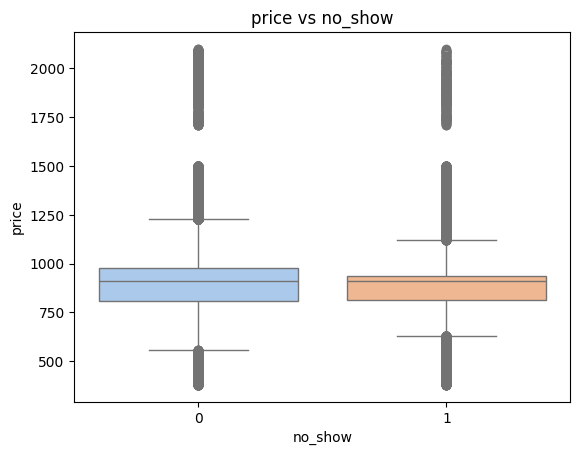

IQR (Interquartile Range) for price by no_show:
no_show
0    168.18
1    122.10
Name: price, dtype: float64


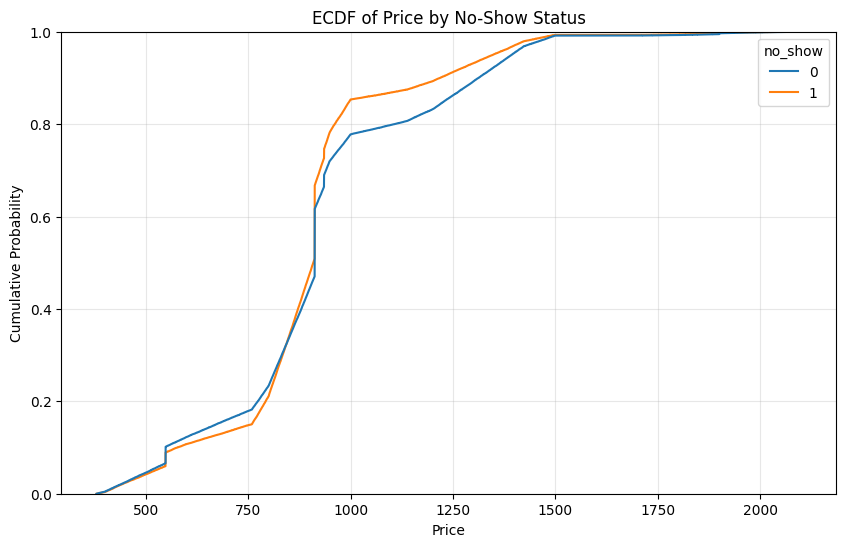

In [101]:
target = "no_show"
feature = "price"
sns.boxplot(x=target, y=feature, data=df, hue=target, palette="pastel", legend=False)

plt.xticks(rotation=0)
plt.title(f"{feature} vs {target}")
plt.show()

# Calculate IQR for temp_price grouped by no_show
iqr_values = df.groupby("no_show")["price"].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

print("IQR (Interquartile Range) for price by no_show:")
print(iqr_values)

#What is the Interquartile Range (IQR)?
#The IQR measures how spread out the middle 50% of your data is.
#It’s a measure of variability that’s less affected by outliers than the full range.

'''fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(x=feature, hue=target, data=df, color="blue", alpha=0.5, kde=True)

plt.xticks(rotation=45)
plt.title(f"{feature} vs {target}")
plt.show()

result = stats.ttest_ind(
    df.loc[df["no_show"] == 0, "price"],
    df.loc[df["no_show"] == 1, "price"],
    equal_var=False
)

print(result.statistic)
print(f"{result.pvalue:.4f}")
print(result.df)'''

plt.figure(figsize=(10,6))
sns.ecdfplot(data=df, x=feature, hue=target)
plt.title("ECDF of Price by No-Show Status")
plt.xlabel("Price")
plt.ylabel("Cumulative Probability")
plt.grid(True, alpha=0.3)
plt.show()

Insights:
- People who showed up (0.0) had a wider price range (more variation).
- People who did not show (1.0) had a narrower price range, i.e., their booking prices were more consistent.
- Both groups have many high-price outliers (above 1500–2000).
- t test, p < 0.05, price and no_show are significantly dependent.

## Multivariate Analysis

In [115]:

'''def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2/n) / (min(k-1, r-1)))

categorical_features = ["no_show", "branch", "booking_month", "arrival_month",
                        "checkout_month", "country", "first_time", "room",
                        "num_adults", "num_children", "platform", "has_children", "days_stayed"]

cramer_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 != col2:
            cramer_matrix.loc[col1, col2] = round(cramers_v(df[col1], df[col2]), 2)
        else:
            cramer_matrix.loc[col1, col2] = np.nan

plt.figure(figsize=(10,8))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap="coolwarm")
plt.title("Cramér’s V Association between Categorical Features")
plt.show()'''

'def cramers_v(x, y):\n    confusion_matrix = pd.crosstab(x, y)\n    chi2 = stats.chi2_contingency(confusion_matrix)[0]\n    n = confusion_matrix.sum().sum()\n    r, k = confusion_matrix.shape\n    return np.sqrt((chi2/n) / (min(k-1, r-1)))\n\ncategorical_features = ["no_show", "branch", "booking_month", "arrival_month",\n                        "checkout_month", "country", "first_time", "room",\n                        "num_adults", "num_children", "platform", "has_children", "days_stayed"]\n\ncramer_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)\n\nfor col1 in categorical_features:\n    for col2 in categorical_features:\n        if col1 != col2:\n            cramer_matrix.loc[col1, col2] = round(cramers_v(df[col1], df[col2]), 2)\n        else:\n            cramer_matrix.loc[col1, col2] = np.nan\n\nplt.figure(figsize=(10,8))\nsns.heatmap(cramer_matrix.astype(float), annot=True, cmap="coolwarm")\nplt.title("Cramér’s V Association between Categorical Fea

In [122]:
#print(cramers_v(df["country"], df["branch"]))

In [116]:
# Example: show top correlated pairs
'''cramer_matrix_unstacked = (
    cramer_matrix.astype(float)
    .unstack()
    .dropna()
    .sort_values(ascending=False)
)
cramer_matrix_unstacked.head(15)'''

'cramer_matrix_unstacked = (\n    cramer_matrix.astype(float)\n    .unstack()\n    .dropna()\n    .sort_values(ascending=False)\n)\ncramer_matrix_unstacked.head(15)'

In [117]:
'''target = "no_show"

target_assoc = {
    col: cramers_v(df[col], df[target]) 
    for col in categorical_features if col != target
}
pd.Series(target_assoc).sort_values(ascending=False)'''

'target = "no_show"\n\ntarget_assoc = {\n    col: cramers_v(df[col], df[target]) \n    for col in categorical_features if col != target\n}\npd.Series(target_assoc).sort_values(ascending=False)'

In [118]:
important_features = ["country", "branch", "first_time", "days_stayed"]

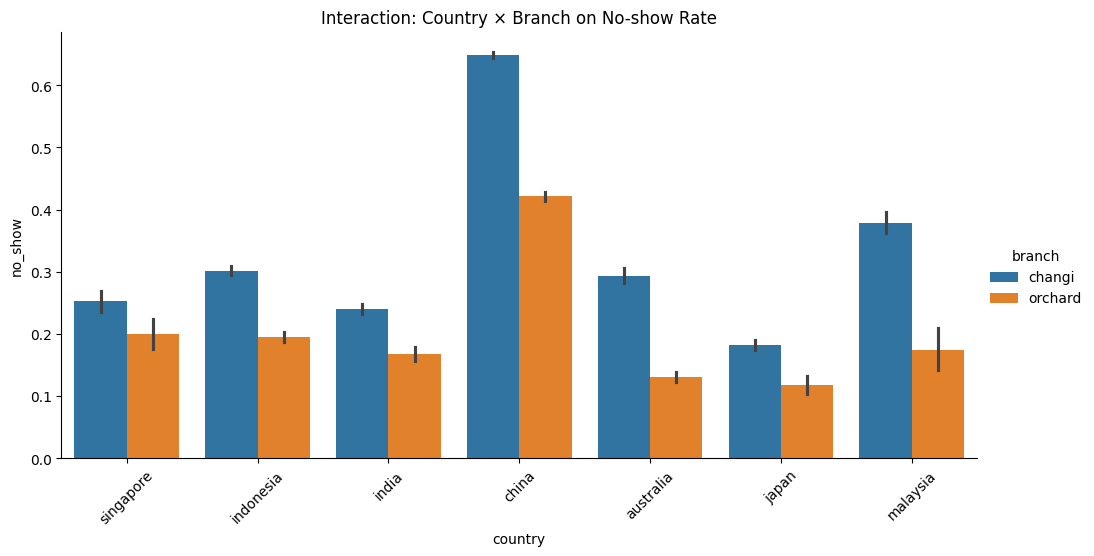

In [13]:
sns.catplot(
    x="country", y="no_show", hue="branch",
    kind="bar", data=df, height=5, aspect=2
)
plt.title("Interaction: Country × Branch on No-show Rate")

plt.xticks(rotation=45)
plt.show()

Insights:
- No-show rates differ significantly by country
- Changi branch consistently experiences higher no-show rates
- Country strongly influences no-show behavior.
- Changi branch shows higher no-shows for every country

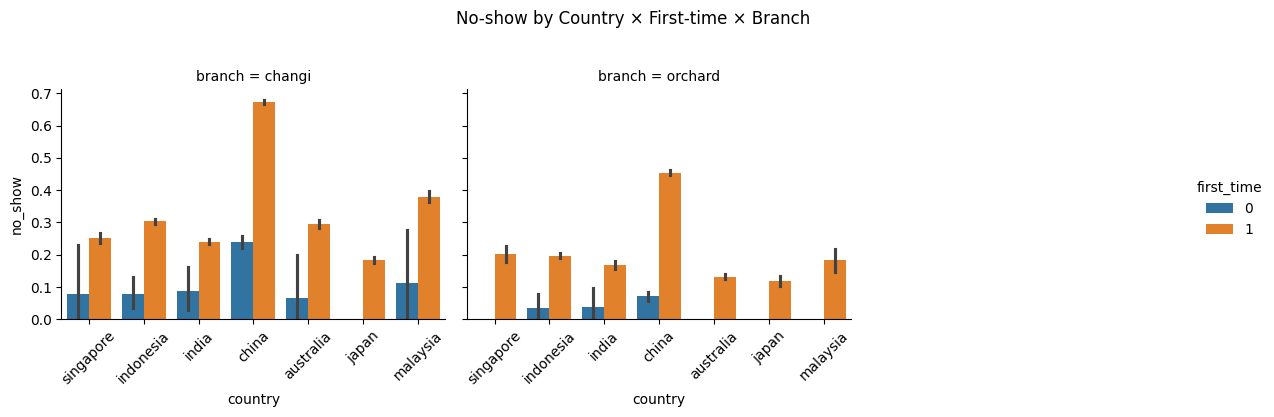

In [103]:
g = sns.catplot(
    x="country", y="no_show", hue="first_time",
    col="branch", kind="bar", data=df, col_wrap=3, height=4
)

# This applies to all subplots
g.set_xticklabels(rotation=45)

plt.suptitle("No-show by Country × First-time × Branch", y=1.03)
plt.tight_layout()
plt.show()

Insights:
- China dominants the no shows for both branches.
- First-time customers have significantly higher no-show rates everywhere
- Returning customers low no shows
- Highest no shows for first timer - China, Malaysia
- Country-level behavior matters

In [108]:
'''sns.catplot(
    x="days_stayed", y="no_show", hue="country",
    kind="point", data=df, height=5, aspect=1.8
)
plt.title("No-show Rate by Days Stayed and Country")
plt.show()'''

'''g = sns.catplot(
    x="country", y="no_show", hue="days_stayed",
    col="branch", kind="bar", data=df, col_wrap=3, height=4
)'''
'''g = sns.catplot(
    data=df,
    x="country",
    y="no_show",
    hue="days_stayed",
    col="branch",
    kind="bar",
    height=5,
    aspect=1.2,
    palette="viridis"
)

# This applies to all subplots
g.set_xticklabels(rotation=45)

plt.suptitle("No-show by Country × First-time × Branch", y=1.03)
plt.tight_layout()
plt.show()'''

'g = sns.catplot(\n    data=df,\n    x="country",\n    y="no_show",\n    hue="days_stayed",\n    col="branch",\n    kind="bar",\n    height=5,\n    aspect=1.2,\n    palette="viridis"\n)\n\n# This applies to all subplots\ng.set_xticklabels(rotation=45)\n\nplt.suptitle("No-show by Country × First-time × Branch", y=1.03)\nplt.tight_layout()\nplt.show()'

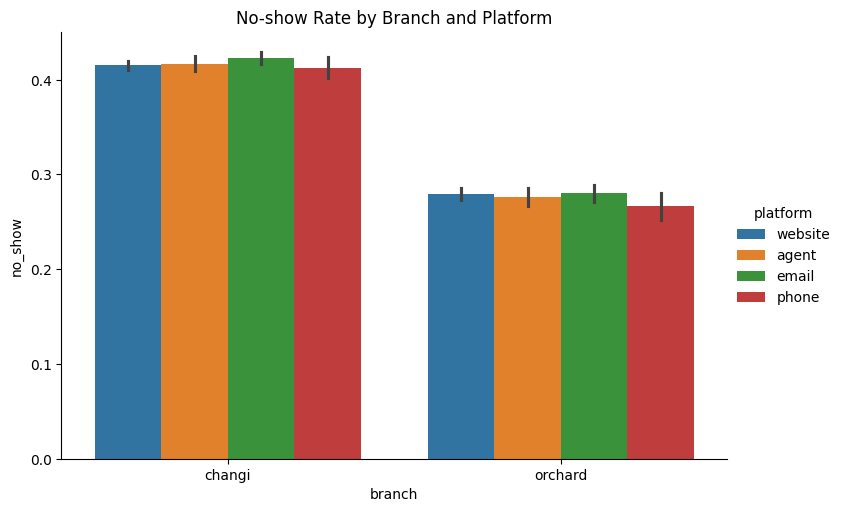

In [8]:
sns.catplot(
    x="branch", y="no_show", hue="platform",
    kind="bar", data=df, height=5, aspect=1.5
)
plt.title("No-show Rate by Branch and Platform")
plt.show()

Insights:
- Similar no show by all platforms in both of the branches.
- Branch matter more in no shows
- Customers who book using different platforms behave similarly.
- There is no platform that causes noticeably more no-shows.
- Platform feature has no predictive power for no_shows.

In [124]:
class_balance = df['no_show'].value_counts(normalize=True) * 100
print(class_balance)

no_show
0    62.958372
1    37.041628
Name: proportion, dtype: float64


Insights:
- target is moderately imbalanced
- Accuracy alone will be misleading
- F1, Recall, Precision, ROC-AUC will be more meaningful
- Using class_weight="balanced" is recommended

Number of outliers in price: 32376


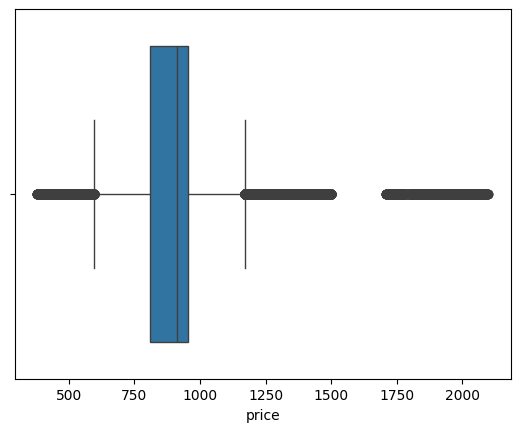

In [127]:
col = 'price'   # change to your numerical column

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"Number of outliers in {col}: {len(outliers)}")

df[f'{col}_outlier'] = df[col].apply(
    lambda x: 1 if (x < lower_bound or x > upper_bound) else 0
)

sns.boxplot(x=df[col])
plt.show()

Number of outliers in days_stayed: 8783


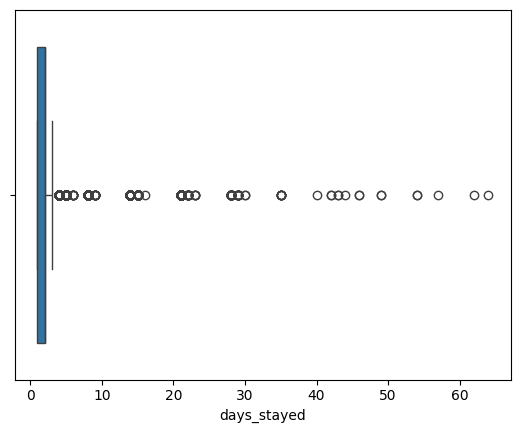

In [130]:
col = 'days_stayed'   # change to your numerical column

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"Number of outliers in {col}: {len(outliers)}")

df[f'{col}_outlier'] = df[col].apply(
    lambda x: 1 if (x < lower_bound or x > upper_bound) else 0
)

sns.boxplot(x=df[col])
plt.show()

In [128]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_summary

{'booking_id': 0,
 'no_show': 0,
 'arrival_day': 0,
 'checkout_day': 0,
 'first_time': 3810,
 'price': 32376,
 'num_adults': 0,
 'num_children': 248,
 'has_children': 0,
 'arrival_year': 0,
 'checkout_year': 0,
 'days_stayed': 8783,
 'price_outlier': 0}

Insights:
- consider log1p for price and days_stayed, large number of outliers.
- impt for logistic regression

In [109]:
'''from statsmodels.graphics.mosaicplot import mosaic
import itertools

categorical_features = ["no_show", "branch", "booking_month", "arrival_month", "checkout_month", "country",
                        "first_time", "room", "num_adults", "num_children", "platform"]

# Create mosaic plots for combinations
def create_mosaic_plots(df, target, features, max_combinations=5):
    for i, feature in enumerate(features[:max_combinations]):
        plt.figure(figsize=(12, 8))
        mosaic_data = pd.crosstab(df[target], df[feature])
        mosaic(mosaic_data.stack(), title=f'{target} vs {feature}')
        plt.show()

create_mosaic_plots(df, "no_show", categorical_features)'''

'from statsmodels.graphics.mosaicplot import mosaic\nimport itertools\n\ncategorical_features = ["no_show", "branch", "booking_month", "arrival_month", "checkout_month", "country",\n                        "first_time", "room", "num_adults", "num_children", "platform"]\n\n# Create mosaic plots for combinations\ndef create_mosaic_plots(df, target, features, max_combinations=5):\n    for i, feature in enumerate(features[:max_combinations]):\n        plt.figure(figsize=(12, 8))\n        mosaic_data = pd.crosstab(df[target], df[feature])\n        mosaic(mosaic_data.stack(), title=f\'{target} vs {feature}\')\n        plt.show()\n\ncreate_mosaic_plots(df, "no_show", categorical_features)'

In [110]:
# Cross-tabulation heatmap
"""cross_tab = pd.crosstab(df['room'], df['has_children'], df['country'], df["no_show"])
sns.heatmap(cross_tab, annot=True, fmt='d')
plt.show()"""

# Using pivot_table for more control
'''pivot_tab = df.pivot_table(
    index=['room', 'has_children', 'num_adults'],
    columns='country',
    values='no_show',
    aggfunc='mean'
)
sns.heatmap(pivot_tab, annot=True, fmt='.2f', cmap='YlOrRd')
plt.show()'''



"pivot_tab = df.pivot_table(\n    index=['room', 'has_children', 'num_adults'],\n    columns='country',\n    values='no_show',\n    aggfunc='mean'\n)\nsns.heatmap(pivot_tab, annot=True, fmt='.2f', cmap='YlOrRd')\nplt.show()"

In [119]:
# Correlation heatmap (numeric only)
#corr = df.corr(numeric_only=True)
#sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
#plt.title("Feature Correlation Heatmap")
#plt.show()

# Pairplot of important features
'''sns.pairplot(df[['price', 'num_children', "has_children", "country", "room",'no_show']], hue='no_show')
plt.show()'''


'sns.pairplot(df[[\'price\', \'num_children\', "has_children", "country", "room",\'no_show\']], hue=\'no_show\')\nplt.show()'

In [ ]:
# If you have a target variable (like no_show encoded as 0/1)
corr_with_target = numeric_df.corr()['no_show'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_with_target.to_frame(), 
            annot=True, 
            cmap='RdYlBu', 
            center=0)
plt.title('Correlation with Target Variable (no_show)')
plt.show()

In [120]:
'''def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)'''

"def column_summary(df):\n    summary_data = []\n\n    for col_name in df.columns:\n        col_dtype = df[col_name].dtype\n        num_of_nulls = df[col_name].isnull().sum()\n        num_of_non_nulls = df[col_name].notnull().sum()\n        num_of_distinct_values = df[col_name].nunique()\n\n        if num_of_distinct_values <= 10:\n            distinct_values_counts = df[col_name].value_counts().to_dict()\n        else:\n            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()\n            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}\n\n        summary_data.append({\n            'col_name': col_name,\n            'col_dtype': col_dtype,\n            'num_of_nulls': num_of_nulls,\n            'num_of_non_nulls': num_of_non_nulls,\n            'num_of_distinct_values': num_of_distinct_values,\n            'distinct_values_counts': distinct_values_counts\n        })\n\n    summary_df = pd.

In [123]:
# --- AUTO VISUALIZATION FUNCTION ---

'''def plot_feature_distributions(df, max_categories=10):
    """
    Plot histograms for numeric columns and bar charts for categorical columns.

    Parameters:
        df (pd.DataFrame): your dataset
        max_categories (int): limit for top categories shown in bar plots
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(exclude=['number']).columns

    print(f"📊 Numeric columns: {list(numeric_cols)}")
    print(f"🏷️ Categorical columns: {list(categorical_cols)}\n")

    # --- Plot histograms for numeric columns ---
    for col in numeric_cols:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

    # --- Plot bar charts for categorical columns ---
    for col in categorical_cols:
        plt.figure(figsize=(6,4))
        # Show top N most frequent categories
        value_counts = df[col].value_counts().head(max_categories)
        sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, legend=False, palette='viridis')
        plt.title(f"Top {max_categories} categories in {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# --- USAGE ---
# assuming your DataFrame is named df
plot_feature_distributions(df)'''

'def plot_feature_distributions(df, max_categories=10):\n    """\n    Plot histograms for numeric columns and bar charts for categorical columns.\n\n    Parameters:\n        df (pd.DataFrame): your dataset\n        max_categories (int): limit for top categories shown in bar plots\n    """\n    numeric_cols = df.select_dtypes(include=[\'number\']).columns\n    categorical_cols = df.select_dtypes(exclude=[\'number\']).columns\n\n    print(f"📊 Numeric columns: {list(numeric_cols)}")\n    print(f"🏷️ Categorical columns: {list(categorical_cols)}\n")\n\n    # --- Plot histograms for numeric columns ---\n    for col in numeric_cols:\n        plt.figure(figsize=(6,4))\n        sns.histplot(df[col].dropna(), kde=True, bins=30, color=\'skyblue\')\n        plt.title(f"Distribution of {col}")\n        plt.xlabel(col)\n        plt.ylabel("Count")\n        plt.grid(axis=\'y\', alpha=0.3)\n        plt.tight_layout()\n        plt.show()\n\n    # --- Plot bar charts for categorical columns ---\n    for

# Folder Structure

```
./
|── eda.ipynb
|── pytest.ini
|── requirements.txt
|── run.sh
|── src/
      |── config.yaml
      |── data/
            |── data_loader.py
            |── data_preprocessor.py
            |── db.py
            |── encoders/
            |      |── cyclical_encoder.py
            |
            |── imputers/
                  |── price_imputer.py
                  |──room_imputer.py
    - transformers
      - checkout_day_transformer.py
      - drop_columns_transformer.py
      - drop_na_transformer.py
      - first_time_transformer.py
      - has_children_transformer.py
      - int_transformer.py
      - log1p_transformer.py
      - lowercase_transformer.py
      - month_transformer.py
      - num_adults_transformer.py
      - price_transformer.py
      - stayed_days_transformer.py
      - zero_to_nan_transformer.py
  - exception
    - config_key_error.py
  - main.py
  - mlpipeline.py
  - models
    - feature_selector.py
    - model_evaluator.py
    - model_trainer.py
  - tests
    - test_checkout_day_transformer.py
    - test_cyclical_encoder.py
    - test_drop_columns_transformer.py
    - test_hello.py
    - test_log1p_transformer.py
  - utils
    - helper.py
    - model_helper.py
```

# c. Instructions for executing the pipeline and modifying any parameters.

## Running the Pipeline
Run the bash script by typing 
```
./run.sh 

```
in a bash shell, the script required excutable permission.

The script will create a Python virtual environment, and install all the dependencies in the requirements.txt, finally will start the pipeline in the main.py.

## Modifying Behavior
We can modify the config.yaml in the ./src directory to allow easy experimentation of different algorithms and
parameters, just modify params in the config.yaml, and run the ./run.sh again for the new settings.

config.yaml:

- data:
  - db_path: "data/noshow.db"
  - table_name: "noshow"
  - required_columns:
    - The columns name in table must be matching required_columns
   
- preprocessing:
  - test_size: 0.2
  - random_state: 42
  - impute_room_strategy: "median"
  - impute_price_strategy: "median"
  - column_mappings:                  (map features to group type)
    - identifier:
      - booking_id: "booking_id"
    - target:
      - no_show: "no_show"
    - numerical:
      - price: "price"
      - num_adults: "num_adults" 
      - num_children: "num_children"
    - categorical:
      - branch: "branch"
      - room: "room"
      - country: "country"
      - platform: "platform"
    - temporal:
      - arrival_month: "arrival_month"
      - checkout_month: "checkout_month"
      - booking_month: "booking_month"
      - arrival_day: "arrival_day"
      - checkout_day: "checkout_day"
    - boolean:
      - first_time: "first_time"

- training:
  - cv_folds: 5                                          (set cv folds to use)
  - scoring_metric: "f1"                                 (set scoring metric to use)
  - save_model: True                                     (whether to save model)
  - model_output_path: "models/trained_model.pkl"        (path to save model)
  - tuning: False                                        (False=no tuning, True=tune then train model with tuned params)
  - select_feature: False                                (False=use all features, True=use selectFromModel() features)
  - drop_feature: True                                   (drop features according to feature_selection -> drop_features)
  - cross_validate: False                                (True=perform cross validation during training, False=skip cross validation)

- feature_selection:
  - feature_selection_threshold: "mean"           ("median", "mean")
  - features_to_drop:                             (select features to drop, only happens if training -> drop_feature: True)
    - features...                                 (check the features available to drop in the command output after preprocessing step)

- tuning:                                (tuning only happens if training -> tuning: True)
  - search_strategy: "random"            ("grid", "random")
  - n_iter: 20
  - n_jobs: -1
  - random_state: 42
  - hyperparameters:                      (Hyperparameters parameter grid for tuning)
    - random_forest:
      - params grid ...
    - logistic_regression:
      - params grid ...
    - xgboost:
      - params grid ...

- model:                           (select model for training, tuning)
  - algorithm: "random_forest"     (model selection: "random_forest", "logistic_regression", "xgboost")
  - hyperparameters:
    - random_forest:
      - params ...
    - logistic_regression:
      - params ...
    - xgboost:
      - params ...
     
- evaluation:                   (evaluation settings)
  - save_reports: true          (save report if true)
  - reports_path: "reports/"    (save location)
  - metrics:                    (metrics that will be calculated)  
    - "accuracy"
    - "precision"
    - "recall"
    - "f1"
    - "f1_macro"
    - "roc_auc"

## Description of logical steps/flow of the pipeline. If you find it useful, please feel free to include suitable visualization aids (eg, flow charts) within the README.

### Flow chart

```
        ┌───────────────┐
        │ Load Data     │
        └───────┬───────┘
                │
  ┌─────────────▼─────────────┐
  │ Split into Train/Test set │
  └─────────────┬─────────────┘
                |
        ┌───────▼──────────────┐
        │ Preprocessing        │
        │ - Cleaning           |
        │ - Transform          |
        │ - Imputation         │
        │ - Encoding           |
        │ - Feature Engineering|
        └───────┬──────────────┘
                │
  ┌─────────────▼─────────────┐
  │ Optional Feature Dropping │
  └─────────────┬─────────────┘
                │
  ┌─────────────▼─────────────┐
  │ Optional Feature Selection│
  └─────────────┬─────────────┘
                │
    ┌───────────▼────────────┐
    │ Optional Model Tuning  │
    └───────────┬────────────┘
                │
     ┌──────────▼─────────┐
     │ Model Training     │
     └──────────┬─────────┘
                │
     ┌──────────▼─────────┐
     │ Evaluation         │
     └──────────┬─────────┘
                │
     ┌──────────▼─────────┐
     │ Save Model & Report│
     └────────────────────┘
```

### Detailed Pipeline Steps:

### Data Loading
Loads SQLite table and validates required columns.

---

### Split data
Split data into training and test sets.

---

### Preprocessing
Operates on raw dataframe in a pipeline:

- Drop unused columns  
- Convert text to lowercase  
- Convert integers  
- Clean month/day fields  
- Price transformation + log1p  
- Imputation for price & room  
- Add engineered features:
  - has_children  
  - stayed_days  
- Cyclical encoding  
- Target encoding  
- ColumnTransformer scaling & one-hot encoding  

---

### Feature Dropping (Optional)
Look into shell output after preprocessing, which are the final features available, select those that you to drop to experiment with the training.

If enabled:
```
training -> drop_feature: true
```

Drops columns defined under:
```
feature_selection -> features_to_drop
```

---

## 4. Feature Selection (Optional)

If enabled:
```
training -> select_feature: true
```

Performs SelectFromModel based on model importance.

---

## 5. Hyperparameter Tuning (Optional)

If enabled:
```
training -> tuning: true
```

Runs:
- GridSearchCV OR RandomizedSearchCV  
- Uses metric defined under:

```
training -> scoring_metric
```

Returning **best_params**.

---

## 6. Model Training

Trains final model using:
- Selected model class  
- Best params (if tuning enabled)  
- CV scoring if enabled  

---

## 7. Evaluation

Computes:
- Accuracy  
- Precision  
- Recall  
- F1  
- F1 Macro  
- ROC-AUC  
- Confusion Matrix  
- Classification Report  

Saves reports under `/reports/`.

---

## 8. Saving the Model

Saved object includes:
- Preprocessor  
- Feature drop list  
- Feature selector  
- Trained model  

Saved under:
```
models/trained_model.pkl
```

---

## Quick summary of EDA

Issues found during EDA, include:
- A row with null target - no_show
- Missing values in room and price features
- Incorrect data type and mixed currency for price feature
- Some features with incorrect data types
- Negative checkout_day
- Mixed case for arrival_month (88 unique months)

Please see next sections on what and how the features are proccessed.

Strong predictor features:
- branch
- country
- first_time


## Describe how the features in the dataset are processed

## Data Preprocessing Summary

| Seq | Feature         | Preprocess Method                                              | Example From                | To / Result                  | Outcome / Explanation                                                                 | Notes |
|-----|-----------------|----------------------------------------------------------------|-----------------------------|------------------------------|----------------------------------------------------------------------------------------|-------|
| 1   | no_show         | Drop rows with null target                                     | —                           | row dropped                  | Ensures target is valid                                                               | Only 1 null row |
| 2   | booking_id      | Drop feature                                                   | —                           | removed                      | Identifier not useful for modeling                                                    | Not predictive |
| 3   | branch          | Lowercase strings                                              | Changi                      | changi                       | Standardizes category text                                                             | Consistency |
| 3   | booking_month   | Lowercase strings                                              | December                    | december                     | Standardizes text before mapping to integers                                          | Consistency |
| 3   | arrival_month   | Lowercase strings                                              | December                    | december                     | Same as above                                                                          | |
| 3   | checkout_month  | Lowercase strings                                              | December                    | december                     | Same as above                                                                          | |
| 3   | country         | Lowercase strings                                              | China                       | china                        | Standardizes country names                                                             | |
| 3   | first_time      | Lowercase strings                                              | Yes                         | yes                          | Standardizes values                                                                    | |
| 3   | num_adults      | Lowercase strings (if object)                                 | One                         | one                          | Fix inconsistent text formats                                                          | |
| 3   | platform        | Lowercase strings                                              | Email                       | email                        | Standardizes values                                                                    | |
| 3   | room            | Lowercase strings                                              | King                        | king                         | Standardizes values                                                                    | |
| 3   | price           | Lowercase strings                                              | USD199.99                   | usd199.99                    | Prepares for numeric conversion                                                        | |
| 4   | num_adults      | Convert object → int64                                         | “one”, “1”                  | 1                            | Fix invalid dtype                                                                      | Required |
| 5   | first_time      | Binary conversion (yes/no → 1/0)                               | yes, no                     | 1, 0                         | Creates accurate binary feature                                                        | |
| 6   | booking_month   | Map month text → month index (1–12)                           | january                     | 1                            | Prepares for cyclical encoding                                                         | |
| 6   | arrival_month   | Map month text → month index                                   | february                    | 2                            | Same                                                                                   | |
| 6   | checkout_month  | Map month text → month index                                   | january                     | 1                            | Same                                                                                   | |
| 7   | price           | Convert object → float                                         | USD100.00                   | 100.0                        | Fix dtype                                                                              | Required |
| 8   | price           | Impute None using nearest neighbor (branch, price group)       | None                        | 456                          | Handles missing price values                                                           | Many missing |
| 9   | room            | Impute None using nearest neighbor (price, branch group)       | None                        | king                         | Fills missing room types                                                               | Many missing |
| 10  | price           | log1p transform                                                | 2000                        | 7.6                          | Compresses extreme outliers                                                            | Good for RF/LR |
| 11  | arrival_day     | float → int64                                                  | 25.0                        | 25                           | Fix dtype                                                                              | |
| 11  | num_children    | float → int64                                                  | 1.0                         | 1                            | Fix dtype                                                                              | |
| 11  | checkout_day    | float → int64                                                  | 22                          | 22                           | Fix dtype                                                                              | |
| 12  | checkout_day    | Fix negative values                                            | -5                          | 5                            | Corrects invalid dates                                                                 | |
| 13  | has_children    | New feature: num_children > 0                                  | 0,1,2                       | 0/1                          | Helps model capture child/no-child behavior                                            | Useful |
| 14  | stayed_days     | checkout_date – arrival_date                                   | Aug 12 – Aug 10             | 2                            | Length-of-stay feature                                                                 | Highly predictive |
| 15  | arrival_month   | Cyclical encoding (12 months)                                  | 1/12                        | sin, cos                     | Represents seasonality                                                                 | Removes ordinality |
| 15  | checkout_month  | Cyclical encoding                                              | 1/12                        | sin, cos                     | Same                                                                                   | |
| 15  | booking_month   | Cyclical encoding                                              | 1/12                        | sin, cos                     | Same                                                                                   | |
| 15  | arrival_day     | Cyclical encoding (31 days)                                    | 1/31                        | 0.20, 0.979                  | Represents within-month cycle                                                          | |
| 15  | checkout_day    | Cyclical encoding (31 days)                                    | 1/31                        | 0.20, 0.979                  | Same                                                                                   | |
| 16  | room            | Target Encoding                                                | king                        | 0.28                         | Numeric mean encoding based on no_show rate                                            | Reduces cardinality |
| 16  | country         | Target Encoding                                                | china                       | 0.60                         | Same                                                                                   | |
| 16  | platform        | Target Encoding                                                | email                       | 0.21                         | Same                                                                                   | |
| 17  | branch          | One-hot encoding                                               | changi                      | one_hot__changi              | Creates binary column per branch                                                       | Prevents leakage |
| 17  | price           | Robust scaling                                                 | 1500                        | 1.75                         | Handles outliers better than StandardScaler                                            | Best for long-tailed |
| 17  | num_adults      | MinMax scaling                                                 | 4                           | 1.0                          | Normalizes to 0–1                                                                      | Helps LR/SVM |
| 17  | num_children    | MinMax scaling                                                 | 1                           | 0.5                          | Normalizes to 0–1                                                                      | Helps LR/SVM |


## Explanation of your choice of models

Logistic Regression:
- Target variable is binary, very suitable for Logistic Regression.
- Logistic Regression requires all input features to be numeric. The features are cleaned, converted into numeric form, appropriate scaling such as RobustScaler (price), MinMaxScaler (num_adults, num_children) and Log1p (price), etc, has been done to create a fully numeric feature matrix very suitable for Logistic Regression.
- Logistic Regression performs well as a baseline on tabular data.

Random Forest:
- Handle well the complexities of mixed data types (numeric, categorical), nonlinear relationships, with some engineered features, and outliers, similar to no show dataset.
- Works well with non-linear relationships, e.g extreme price -> lower chance of no-show.
- Robust to outliers and noise, such as the right skewed price feature, extreme high room price.
- Can captures feature interactions automatically e.g room & branch, arrival_month & checkout_month, etc.
- Can provides feature importance, e.g shows which features is important for no_show target, shows whether engineered features are useful (stayed_days, has_children, cyclical sin/cos).
- Random Forest is a tree-based model, these decision trees are not affected by scaling or distribution, whether the data is scaled or not, our data has all been scaled and transformed, thus is suitable for all models to train on it.
- Price feature has extreme outliers for premium rooms, Random Forest splits on thresholds (not distances), so outliers do not affect the model heavily.
- Captures Feature Interactions Automatically

XGBoost:
- It is a gradient boosting algorithm designed specifically for structured tabular data, like no show dataset.
- Can handle complex patterns and subtle relationships, suitable for mixed categorical, numerical data, engineered features, and nonlinear relationships.
- Can learns very fine-grained patterns, e.g small variations in percentage of no_show in arrival month/day may help in predictions.
- Works well with Target encoding, e.g captures nonlinearities in target-encoded values well.
- Can handle class imbalance, e.g no-show rate is moderately imbalanced, can improves recall and F1 performance.
- Known to perform better than Logistic Regression.

## Evaluation of the models developed. Any metrics used in the evaluation should also be explained.

Scoring Metric used: F1. 
- It balances precision and recall.
- great for imbalanced datasets like no show dataset.
- Both False Positive(FP) and False Negative(FN) matter in hotel no-shows.
- precision = tp / tp + fp -> how many actual out of predicted no shows.
- recall = tp / tp + fn    -> how many correct out of actual no shows

```
/
│
├── config.yaml
├── train.py
├── README.md
│
├── data/
│   ├── encoders/
│   ├── data_preprocessor.py
│   ├── transformers/
│   ├── imputers/
│
├── models/
│   ├── model_trainer.py
│   ├── model_evaluator.py
│   ├── feature_selector.py
│
├── utils/
│   ├── helper.py
│
├── reports/
├── models/
└── logs/
```